# 1. Introduction


In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as pyplt
%matplotlib inline
import keras as ks
import sklearn.preprocessing as pre
import sklearn.model_selection as mod
import sklearn.decomposition as dec
from sklearn.utils import shuffle
from sklearn.datasets import load_boston
boston = load_boston()

Using TensorFlow backend.
c:\users\conor\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\conor\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\conor\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\conor\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
#df = pd.DataFrame(boston.data, columns=boston.feature_names)
#df['target'] = boston.target

In [3]:
df = pd.DataFrame(boston.data)
df['Median_Value'] = boston.target

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Median_Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### About the Dataset

This dataset was created from data taken from the 1970 United States census and other sources and used in a paper investigating the willingness of people to pay more for clean air in the Boston housing market. 

Harrison, D. and Rubinfeld, D. (1978). Hedonic housing prices and the demand for clean air. Journal of Environmental Economics and Management, 5(1), pp.81-102.

The scikit learn source includes a description file that can be printed to learn more about the dataset and it's features:

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

However, I found the above descriptions the datasets attributes to be unclear so I read the original source paper to get more detail. My updated decscriptions are included below are based on Table IV in the source paper.

|Orginal Attribute Name|New Name|Description|Assumed Relationship to Housing Values|
|:------------------------|:---------|:-----------|:------------------------------|
|CRIM|Crime_Rate|Crime rate by town|Negative|
|ZN|%_Large_Plots|Proportion of residential land zoned for large plots|Postive|
|INDUS|%_Indus|Proportion of land zoned for industrial use|Negative|
|CHAS|By_River|Boolean value for whether the land borders the Charles River|Positive|
|NOX|NOX|Nitrogen oxide concentrations in the air|Negative|
|RM|Rooms|Average number of rooms in houses|Positive|
|AGE|%_Pre_1940|Proporation of houses constructed before 1940. Older housing is of good quality in Boston|Positive|
|DIS|Dist_to_Jobs|Weighted distance to places of employment|Positive|
|RAD|Highway_Access|Index of accessabilty to highways|Positive|
|TAX|Tax|Property Tax rate in the area|Negative|
|PTRATIO|PTRatio|Pupil-Teacher ration in the area. Higher values mean more students per teacher|Negative|
|B|Blks_per_1000|Proportion of the population that are black. Regarded as undisirable by Whites|Negative|
|LSTAT|%_Lower_Status|Proportion of adults without a high school education or male laborers|Negative|

### Adding more readable column names

In [6]:
#setting columns names
df.columns = ["Crime_Rate", "%_Large_Plots", "%_Indus", "By_River", "NOX", "Rooms", "%_Pre_1940", "Dist_to_Jobs", "Highway_Access", "Tax", "PTRatio", "Blks_per_1000", "%_Lower_Status", "Median_Val"]

In [7]:
#checking the new column names line up 
df.head()

,Crime_Rate,%_Large_Plots,%_Indus,By_River,NOX,Rooms,%_Pre_1940,Dist_to_Jobs,Highway_Access,Tax,PTRatio,Blks_per_1000,%_Lower_Status,Median_Val
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.tail()

,Crime_Rate,%_Large_Plots,%_Indus,By_River,NOX,Rooms,%_Pre_1940,Dist_to_Jobs,Highway_Access,Tax,PTRatio,Blks_per_1000,%_Lower_Status,Median_Val
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [9]:
df.columns

Index(['Crime_Rate', '%_Large_Plots', '%_Indus', 'By_River', 'NOX', 'Rooms',
       '%_Pre_1940', 'Dist_to_Jobs', 'Highway_Access', 'Tax', 'PTRatio',
       'Blks_per_1000', '%_Lower_Status', 'Median_Val'],
      dtype='object')

# 2. Descriptive Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
Crime_Rate        506 non-null float64
%_Large_Plots     506 non-null float64
%_Indus           506 non-null float64
By_River          506 non-null float64
NOX               506 non-null float64
Rooms             506 non-null float64
%_Pre_1940        506 non-null float64
Dist_to_Jobs      506 non-null float64
Highway_Access    506 non-null float64
Tax               506 non-null float64
PTRatio           506 non-null float64
Blks_per_1000     506 non-null float64
%_Lower_Status    506 non-null float64
Median_Val        506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


#### Distribution of values

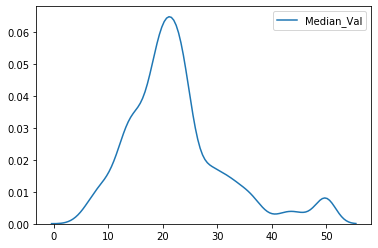

In [11]:
sns.kdeplot(df['Median_Val'])

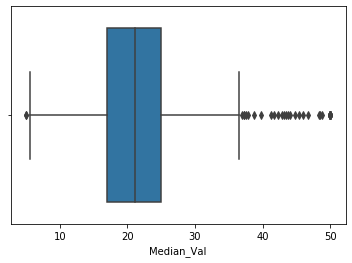

In [12]:
sns.boxplot(df['Median_Val'])

In [13]:
df.describe()

,Crime_Rate,%_Large_Plots,%_Indus,By_River,NOX,Rooms,%_Pre_1940,Dist_to_Jobs,Highway_Access,Tax,PTRatio,Blks_per_1000,%_Lower_Status,Median_Val
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


There are lots of outliers in the upper range of values

### Note look at this article 
https://www.ritchieng.com/machine-learning-project-boston-home-prices/

Good examples of data exoplorations and statistics on pricing 
And linear regression later on.

Creating a corrolation matrix to see if there is any relationship betweek the variables.

In [14]:
corr_matrix = df.corr().round(2)
corr_matrix.style.background_gradient(cmap='coolwarm')

,Crime_Rate,%_Large_Plots,%_Indus,By_River,NOX,Rooms,%_Pre_1940,Dist_to_Jobs,Highway_Access,Tax,PTRatio,Blks_per_1000,%_Lower_Status,Median_Val
Crime_Rate,1,-0.2,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
%_Large_Plots,-0.2,1,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
%_Indus,0.41,-0.53,1,0.06,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
By_River,-0.06,-0.04,0.06,1,0.09,0.09,0.09,-0.1,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
Rooms,-0.22,0.31,-0.39,0.09,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
%_Pre_1940,0.35,-0.57,0.64,0.09,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
Dist_to_Jobs,-0.38,0.66,-0.71,-0.1,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
Highway_Access,0.63,-0.31,0.6,-0.01,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
Tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


In [15]:
median_val_corr = corr_matrix.iloc[-1]
median_val_corr.sort_values(ascending=True)

%_Lower_Status   -0.74
PTRatio          -0.51
%_Indus          -0.48
Tax              -0.47
NOX              -0.43
Crime_Rate       -0.39
%_Pre_1940       -0.38
Highway_Access   -0.38
By_River          0.18
Dist_to_Jobs      0.25
Blks_per_1000     0.33
%_Large_Plots     0.36
Rooms             0.70
Median_Val        1.00
Name: Median_Val, dtype: float64

The average number of Rooms per House (0.7) and the % of People of Lower Status (-0.74) are the mostly strongly corrolated with the Median Value of houses

Also, worth noting the high corrolation between NOX and industrialisation (0.76) , Tax and Access to Highways (0.91)

### Corrolation and Sensitivity to different variables

1. Benefit of less NOX drops when DIS and RAD are removed. This is because the advantages of greater accessability cancel out the disadvantages of less clean air. 
2. The affect of higher NOX levels can easily be attributed to a higher proportion of lower status households. 
3. In general there is a high degree of heteroscedasticity. As X increases there is a larger variance in Y. 

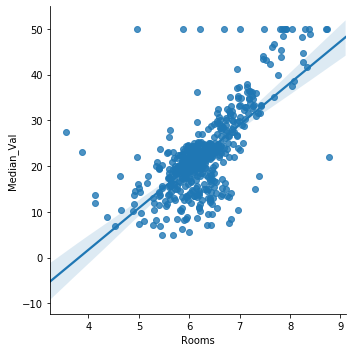

In [16]:
sns.lmplot(x="Rooms", y="Median_Val", data=df)

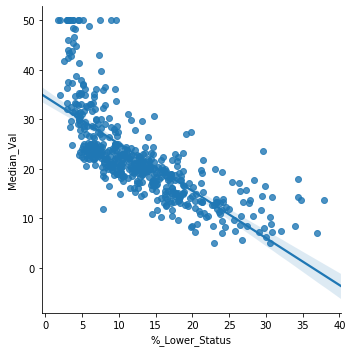

In [17]:
sns.lmplot(x="%_Lower_Status", y="Median_Val", data=df)

Looking at 2 next most closely corrolated attributes: Crime rate and Pupil teacher ratio shows there is a far less obvious relationship.

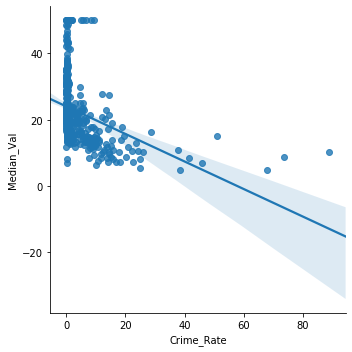

In [18]:
# lmplot of a weakly corrolated value "Distance to areas of employement (Dist_to_Jobs)"
sns.lmplot(x="Crime_Rate", y="Median_Val", data=df)

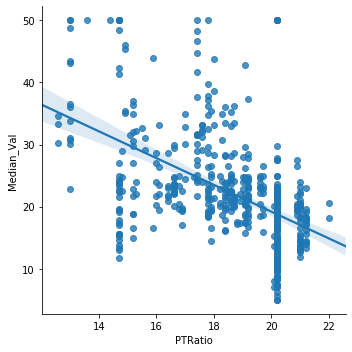

In [19]:
# lmplot of a weakly corrolated value "Distance to areas of employement (Dist_to_Jobs)"
sns.lmplot(x="PTRatio", y="Median_Val", data=df)

# 3. Inferential Statistics

#### Objective 2: Analyse whether there is a significant difference between median house prices between houses that are along the Charles river and those that aren't.

The first attribute who's effect on housing prices that I was asked to investigate is whether the house is by the Charles River or not ("CHAS" or "By_River").

In the original paper this dataset was derived from, the authors assumed there would be a positive relationship between being next to the river and housing prices.

As I have shown above, there only seems to be a very week positive corrolation (0.18).

In order to investigate further I have performed a T-Test below..

In [20]:
# getting the count of areas next to the Charles river
count_by_river = len(df[df['By_River'] == 1.0])
count_by_river

35

In [21]:
# getting the count of areas away from the Charles River
count_away_from_river = len(df[df['By_River'] == 0.0])
count_away_from_river

471

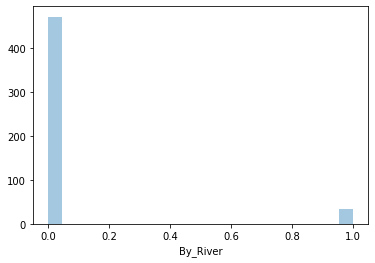

In [22]:
sns.distplot(df['By_River'], kde=False)

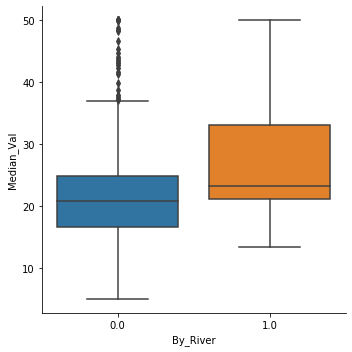

In [23]:
sns.catplot(x='By_River', y='Median_Val', kind='box', data=df)
# What do all the outliers mean

As we can see from the above counts and histogram, there are significantly more areas in our dataset that are located away from the Charles rive (471) vs next to the Charles River (35). There are also a significant number of outliers in the Median Value of houses in areas that are away from the river.

### Discuss issues with unequal sample sizes

Unequal sample sizes are a common issue that can lead to:
* Unequal variances between samples, which affects the assumption of equal variances in ANOVA Tests. 
* A general loss of power as equal size groups maxamize statistical power. This means it less likely the test will detect and effect if there is an effect to be detected.
* Issues with confounding variables.

However, while we need to be mindful of this it does not invalidate the results of an ANOVA test. 

In [24]:
next_to_river = df[df['By_River'] == 1]
away_from_river = df[df['By_River'] == 0]
next_to_river["Median_Val"].describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: Median_Val, dtype: float64

In [25]:
away_from_river["Median_Val"].describe()

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: Median_Val, dtype: float64

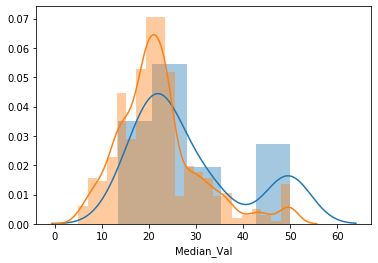

In [26]:
ax = sns.distplot(next_to_river['Median_Val'])
ax = sns.distplot(away_from_river['Median_Val'])
pyplt.rcParams["figure.figsize"] = (20,20)

### T-test

Before we can apply a T-Test, it first necessary to ensure that our datasets meet the requirements:

|#|Requirement|Pass|Reasoning|
|:------------------------|:---------|:-----------|:-----------|
|1|Dependent variable should be measured on continuous scale|YES|Median Value is measured on continuous scale|
|2|Independent variable should consist of two categorical independant groups|YES|Areas are either by or not by the river|
|3|Independence of observations|YES|None of the areas appear twice and no house appears in more than one area|
|4|There should be no significant outliers|NO|There are a number of outliers in the Median Values of houses not by the river|
|5|Dependent variable should be approximately normally distributed for each group|UNKNOWN|At first glance yes, but we will need to test to be sure|
|6|Needs to be homogeneity of variances|UNKNOWN|We will also need to test for this|


As you can see above, the first three requirements were met, but the 4th requirement was failed and the 5th and 6th requirements required further investigation before we can continue with out T-Test.

### Removing Outliers

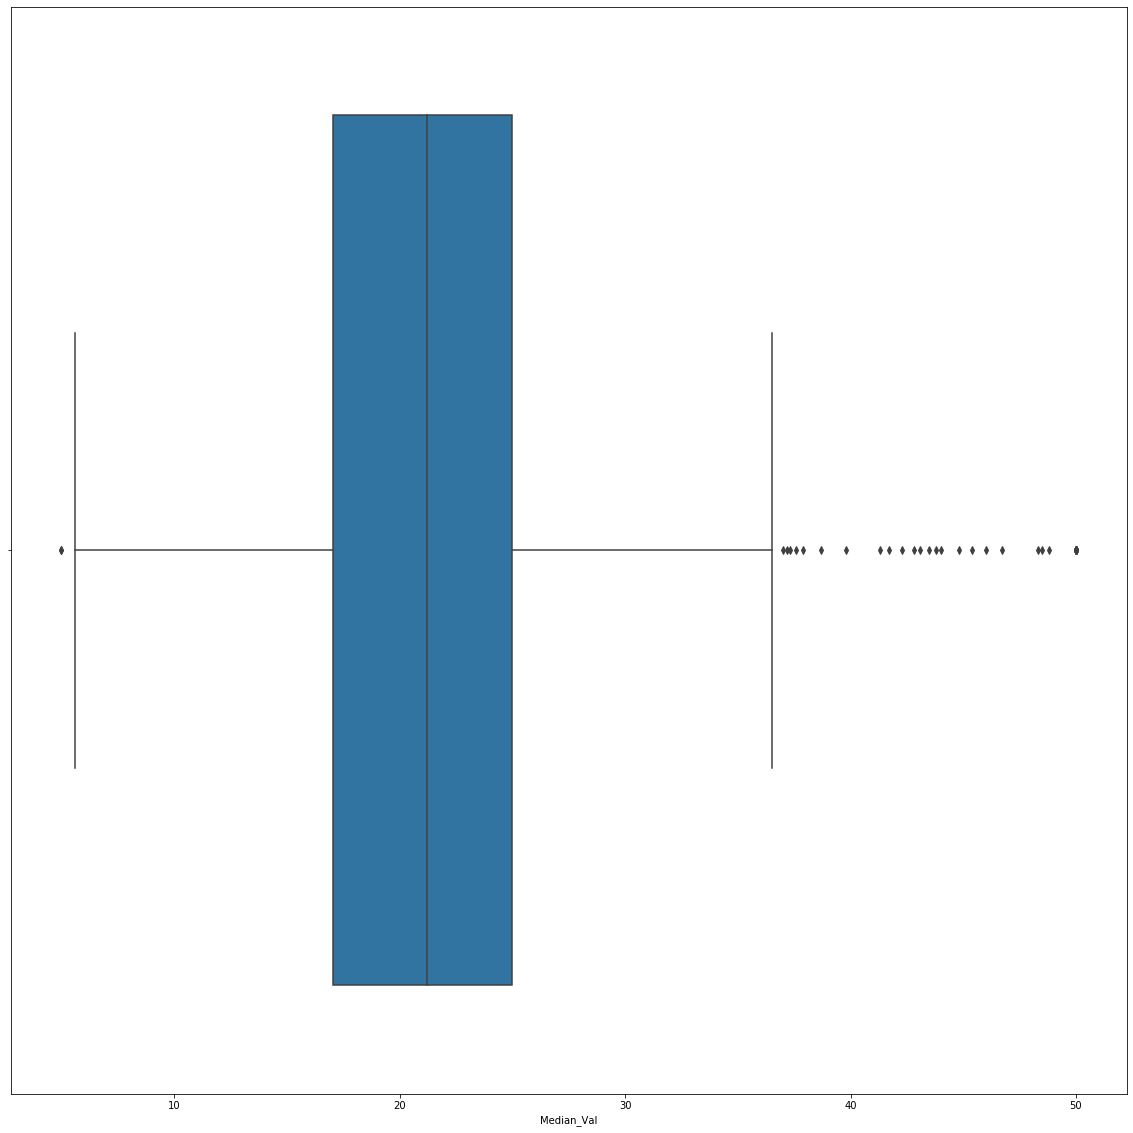

In [27]:
sns.boxplot(df['Median_Val'])

As we can see from the boxplot that we generated earlier there are a significant number of outliers in the target variable ("Median_Val"). There are also 16 areas where the median value of houses is $50,000. This indicates  that there might be a cap on values in the dataset at this value or that this value was entered where accurate information was not available. We could just remove these values, but first I will investigate how many outliers there are in total.

In order to identify the outliers we need to assign a threshold for the Median Value, above or below which we will consider the data point to be an outlier. The most obvious way of this is to follow the same method as the box-plot an remove an datapoints that are outside of the 75th and 25th percentiles. The Pandas library has a built in quantile method that can be used to calculate these thresholds.

In [28]:
Q1 = df['Median_Val'].quantile(0.25)
Q1

17.025

In [29]:
Q3 = df['Median_Val'].quantile(0.75)
Q3

25.0

In [30]:
IQR = Q3 - Q1
IQR

7.975000000000001

Now that the interquartile range has been calculated we can find the upper and lower "whisker" values for the box plot which will acts as our thresholds.

In [31]:
# calculate where the tip of the lower boxplot whisker is
lower_thresh = Q1 - 1.5 * IQR
lower_thresh

5.0624999999999964

In [32]:
# calculate where the tip of the upper boxplot whisker is
upper_thresh = Q3 + 1.5 * IQR
upper_thresh

36.962500000000006

In [33]:
# show all values that are below the lower outlier threshold
below = df.loc[df['Median_Val'] < lower_thresh]
below

,Crime_Rate,%_Large_Plots,%_Indus,By_River,NOX,Rooms,%_Pre_1940,Dist_to_Jobs,Highway_Access,Tax,PTRatio,Blks_per_1000,%_Lower_Status,Median_Val
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0


There are two data points below the lower threshold.

In [34]:
# show all values that are above the upper outlier threshold
above = df.loc[df['Median_Val'] > upper_thresh]
above

,Crime_Rate,%_Large_Plots,%_Indus,By_River,NOX,Rooms,%_Pre_1940,Dist_to_Jobs,Highway_Access,Tax,PTRatio,Blks_per_1000,%_Lower_Status,Median_Val
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0.0,0.4450,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8
157,1.22358,0.0,19.58,0.0,0.6050,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59,41.3
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
179,0.05780,0.0,2.46,0.0,0.4880,6.980,58.4,2.8290,3.0,193.0,17.8,396.90,5.04,37.2
180,0.06588,0.0,2.46,0.0,0.4880,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56,39.8
182,0.09103,0.0,2.46,0.0,0.4880,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82,37.9


In [35]:
above["Median_Val"].count()

38

There are 38 datapoints that are higher that the upper threshold. We can create a dataset called "no_outliers" that does not contain any outliers by removing both these groups.

In [36]:
no_outliers = df[((df['Median_Val'] > lower_thresh) & (df['Median_Val'] < upper_thresh))]
no_outliers

,Crime_Rate,%_Large_Plots,%_Indus,By_River,NOX,Rooms,%_Pre_1940,Dist_to_Jobs,Highway_Access,Tax,PTRatio,Blks_per_1000,%_Lower_Status,Median_Val
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


We can then compare what our two populations look like with the outliers removed.

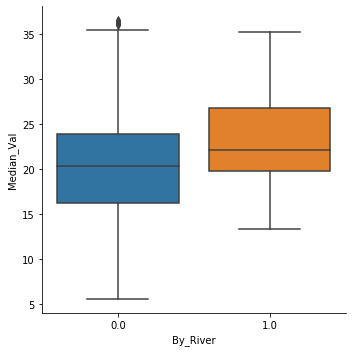

In [37]:

sns.catplot(x='By_River', y='Median_Val', kind='box', data=no_outliers)

### The dependant varibale needs to be approxmately normally distributed in each group.

In order to test this I created two new groups from the "no_outliers" dataset.

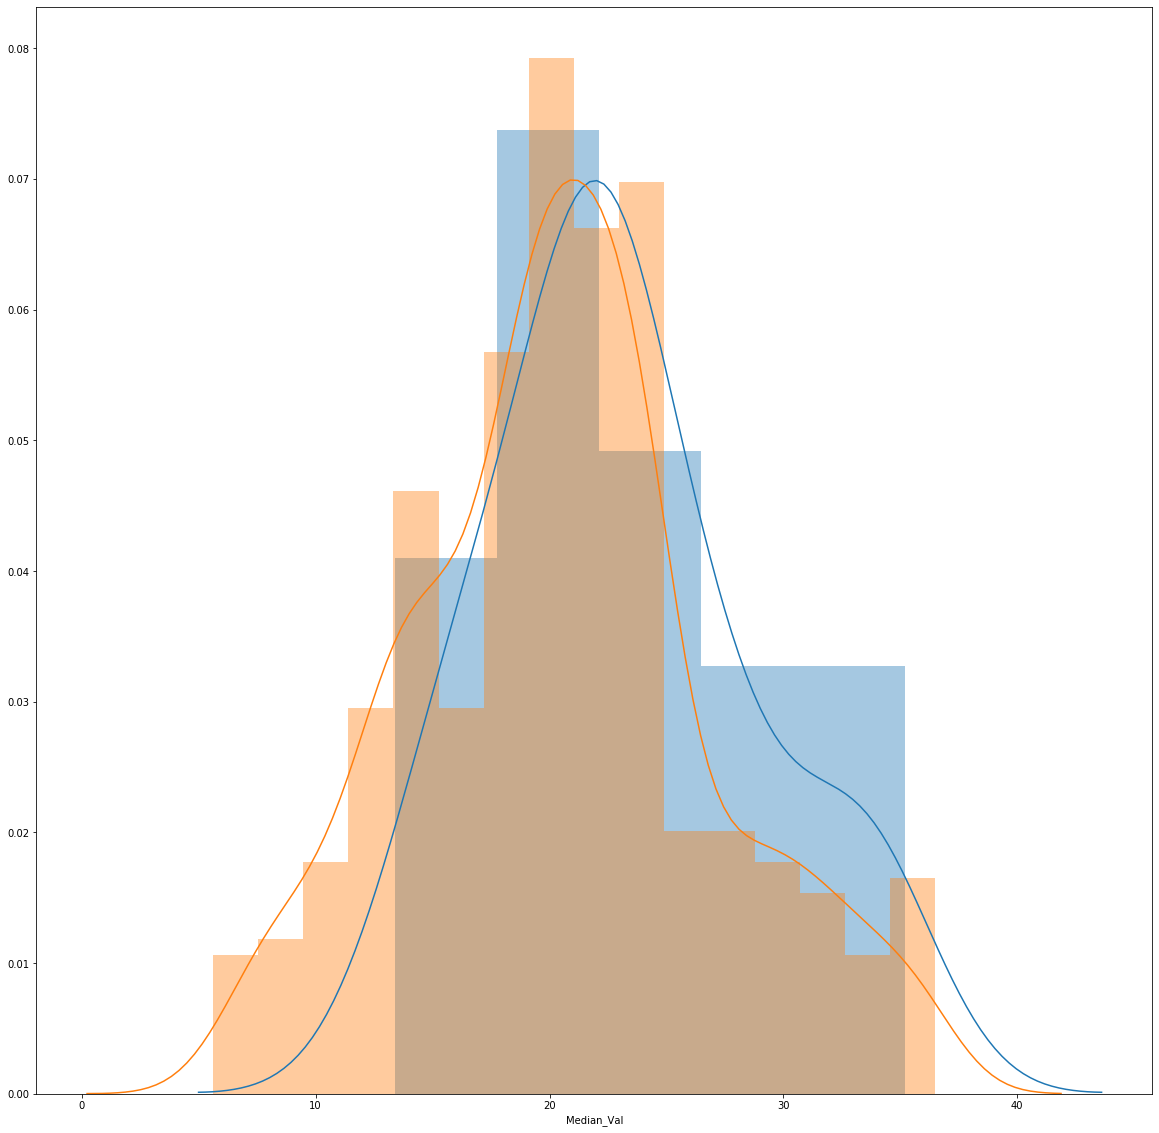

In [38]:
cleansed_next_to_river = no_outliers[no_outliers['By_River'] == 1]
cleansed_away_from_river = no_outliers[no_outliers['By_River'] == 0]

ax = sns.distplot(cleansed_next_to_river['Median_Val'])
ax = sns.distplot(cleansed_away_from_river['Median_Val'])
pyplt.rcParams["figure.figsize"] = (20,20)

From looking at the two "cleansed" datasets it can be observed that both are much closer to appearing to be normally distributed. However, we will need to test for this using Scipys "normaltest" function.

In [39]:
from scipy import stats
next_to_river_Ntest = stats.normaltest(cleansed_next_to_river['Median_Val'])
away_from_river_Ntest = stats.normaltest(cleansed_away_from_river['Median_Val'])
print(next_to_river_Ntest)
print(away_from_river_Ntest)


NormaltestResult(statistic=1.289316190319236, pvalue=0.5248419574390437)
NormaltestResult(statistic=3.405851916816045, pvalue=0.1821497808954563)


For both groups the Pvalue is greater than the alpha threshold(0.05). We can therefore say with a good degree of certainty that the data is normally distributed.
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

### Homogenity of Variances

Homogeneity of variance is an assumption underlying t tests in which the population variances (i.e., the distribution, or “spread,” of scores around the mean) of two or more samples are considered equal. In correlations and regressions, the term “homogeneity of variance in arrays,” also called “homoskedasticity,” refers to the assumption that, within the population, the variance of Y for each value of X is constant.

In order to perform a valid ttest we need to check if both samples have similar variances. Levenes test can be used to do this it. It tests the null hypothosis that variances are equal. 

In [40]:
# 
stats.levene(cleansed_next_to_river['Median_Val'], cleansed_away_from_river['Median_Val'])

LeveneResult(statistic=0.7964820987689898, pvalue=0.3726098479576784)

The Pvalue is greater than the threshold of 0.05 so we can say that there is no signifcant difference in the variances of both groups.

In [41]:
# variance of median values of houses next to the river
print(np.var(cleansed_next_to_river['Median_Val']))

31.402091836734694


In [42]:
# variance of values of house in areas away from the river
print(np.var(cleansed_away_from_river['Median_Val']))

41.76279086132484


### Summary of T Test Requirement Statuses

|#|Requirement|Pass|Reasoning|
|:------------------------|:---------|:-----------|:-----------|
|1|Dependent variable should be measured on continuous scale|YES|Median Value is measured on continuous scale|
|2|Independent variable should consist of two categorical independant groups|YES|Areas are either by or not by the river|
|3|Independence of observations|YES|None of the areas appear twice and no house appears in more than one area|
|4|There should be no significant outliers|YES|There were originally, but they have removed them.|
|5|Dependent variable should be approximately normally distributed for each group|YES|Both groups are approximately normally distrubuted.|
|6|Needs to be homogeneity of variances|YES|There is homogenity of variances|


### T Test Results

Since all the requirements were met, it was appropriate to proceed with the T Test.

In [43]:
stats.ttest_ind(cleansed_next_to_river['Median_Val'], cleansed_away_from_river['Median_Val'])

Ttest_indResult(statistic=2.100509858104912, pvalue=0.03622310352018016)

The purpose of the current study was to test if there is a significant difference in the Median_Value between the house prices in areas by or not by the Charles River in Boston.

In [44]:
import researchpy as rp

tt_descriptives, tt_results = rp.ttest(cleansed_next_to_river['Median_Val'], cleansed_away_from_river['Median_Val'])

tt_descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Median_Val,28.0,23.192857,5.706587,1.078444,20.980074,25.405640
1,Median_Val,438.0,20.560959,6.469804,0.309139,19.953375,21.168543
2,combined,466.0,20.719099,6.451416,0.298856,20.131823,21.306374


In [45]:
tt_results

,Independent t-test,results
0,Difference (Median_Val - Median_Val) =,2.6319
1,Degrees of freedom =,464.0000
2,t =,2.1005
3,Two side test p value =,0.0362
4,Difference > 0 p value =,0.9819
5,Difference < 0 p value =,0.0181
6,Cohen's d =,0.4095
7,Hedge's g =,0.4088
8,Glass's delta =,0.4612
9,r =,0.0971


The results of the test show a P value of 0.0362. This is lower than the 0.05 giving a strong indication that we can reject the null hypothesis that there is no difference between Median Value of houses in areas that are by or away from the Charles River in Boston. If the value was greater than 0.05 this would indicate that there was no difference between the two groups.

We can thereforce conclude that there is a significant difference between the housing prices for houses along the Charles River and those not along the Charles River.

# 4. Predictions


Add section discussiong the variables that were selected and why. 

What is the relationship between them all.

ANOVA Test?

## 4.1 Pre-Processing

Preprocessing is an integral step in Machine Learning. Quality of the data must be as good as possible before feeding into the model.

There are a number of different steps we can take to preprocesss the data and ensure the quality of the data:

1. Deal with any Null values
2. Deal with Categorical Variables
3. Standardise the Data


### 4.1.1 Null Values

First we will check to ensure if our cleansed dataset contains any Null values. If there are Null values, the row containing the value will be need to be removed of the value will need to be replaced.

In [46]:
no_outliers.isnull().sum()

Crime_Rate        0
%_Large_Plots     0
%_Indus           0
By_River          0
NOX               0
Rooms             0
%_Pre_1940        0
Dist_to_Jobs      0
Highway_Access    0
Tax               0
PTRatio           0
Blks_per_1000     0
%_Lower_Status    0
Median_Val        0
dtype: int64

As we can see, no of the columns contain Null values. So we can move on.

### 4.1.2 Check for Categorical Variables

As we have already seen there is one categorical variable in the dataset showing whether the area is located by or away from the Charles River.

Luckily this has already been coverted into a "dummy variable" of 0 for No and 1 for Yes. Therefore we dont have to do any encoding or processing of this variable.

In [47]:
no_outliers["By_River"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: By_River, Length: 466, dtype: float64

### 4.1.3 Standardise / Normalise the Data

In standardisation we transform all values such that the means of the values is 0 and the standard deviation is 1.

This helps to prevent a machine learning model from giving a different weight to values that are at a different scale to other values. For example, if we look at the below we can see that variables like the number of black people per 1000 is always going to be higher than the number of Rooms in a house or the Pupil Teacher Ratio.

In [48]:
no_outliers.head()

,Crime_Rate,%_Large_Plots,%_Indus,By_River,NOX,Rooms,%_Pre_1940,Dist_to_Jobs,Highway_Access,Tax,PTRatio,Blks_per_1000,%_Lower_Status,Median_Val
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Before we scale the data it needs to be split into the independent and dependent variables for the model.

It also a good idea to shuffle the data before going any further. 

In [49]:
no_outliers = shuffle(no_outliers)

In [50]:
# create the input from the first 13 variables
# output is the Median Value
x_input = no_outliers.iloc[:, 0:13]
y_output = no_outliers["Median_Val"]

The data then needs to be split into the testing and training sets. For this project we will use a 80:20 train:test split. 

We can use Sklearns model selection tool for this.

In [51]:
#train test splitting
x_train, x_test, y_train, y_test = mod.train_test_split(x_input, y_output, test_size=0.2)

In [52]:
x_train.iloc[0]

Crime_Rate          0.08664
%_Large_Plots      45.00000
%_Indus             3.44000
By_River            0.00000
NOX                 0.43700
Rooms               7.17800
%_Pre_1940         26.30000
Dist_to_Jobs        6.47980
Highway_Access      5.00000
Tax               398.00000
PTRatio            15.20000
Blks_per_1000     390.49000
%_Lower_Status      2.87000
Name: 192, dtype: float64

Once the data is split into testing and training sets it can be scaled.


In [53]:
scaler = pre.StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_input.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_input.columns)

In [54]:
x_train.iloc[0]

Crime_Rate       -0.398225
%_Large_Plots     1.568993
%_Indus          -1.160406
By_River         -0.262613
NOX              -1.000997
Rooms             1.742999
%_Pre_1940       -1.464866
Dist_to_Jobs      1.223230
Highway_Access   -0.495950
Tax              -0.041065
PTRatio          -1.670545
Blks_per_1000     0.373017
%_Lower_Status   -1.498258
Name: 0, dtype: float64

##  4.2 Baseline prediction test

At this stage I performed an inital test of the model to act as a performance baseline. I tuned this model further following this test.

In [55]:
# Defining the Baseline test model
m = ks.models.Sequential()
m.add(ks.layers.Dense(13, input_dim=13, activation="relu"))
m.add(ks.layers.Dense(1))
m.compile(loss="mean_squared_error", optimizer="adam")


Instructions for updating:
Colocations handled automatically by placer.


In [56]:

m.fit(x_train, y_train, epochs=100, batch_size=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
372/372 [==============================] - 0s 811us/step - loss: 470.9000
Epoch 2/100
372/372 [==============================] - 0s 203us/step - loss: 436.0817
Epoch 3/100
372/372 [==============================] - 0s 218us/step - loss: 395.1196
Epoch 4/100
372/372 [==============================] - 0s 200us/step - loss: 341.0747
Epoch 5/100
372/372 [==============================] - 0s 202us/step - loss: 275.6305
Epoch 6/100
372/372 [==============================] - 0s 221us/step - loss: 208.3270
Epoch 7/100
372/372 [==============================] - 0s 214us/step - loss: 149.6299
Epoch 8/100
372/372 [==============================] - 0s 219us/step - loss: 104.7983
Epoch 9/100
372/372 [==============================] - 0s 213us/step - loss: 74.2669
Epoch 10/100
372/372 [==============================] - 0s 213us/step - loss: 55.0255
Epoch 11/100
372/372 [==============================] - 0s 207us/step - loss: 43.4848
Epoch 1

In [57]:
# show the predicted prices for the test input variables
MedianVal_prediction = m.predict(x_test).T
MedianVal_prediction

array([[17.000002, 18.397072, 10.09248 , 18.391504, 18.406725, 20.597612,
        14.60176 , 31.084995, 10.865223, 19.560375, 12.370577, 22.118069,
        16.766623, 24.685575, 33.262375, 20.977335, 11.764439, 11.107795,
        23.783787, 29.615261, 29.222994, 28.893614, 17.306519, 12.385655,
        26.143154, 16.964819, 32.54955 , 18.540123, 18.50437 ,  7.762835,
        16.418482, 24.331944, 20.92474 , 34.216404, 20.198692, 16.032059,
        25.453003, 12.60549 , 17.710217, 31.23279 , 15.90489 , 26.421162,
        31.327312, 17.315697, 21.629143, 22.12165 , 22.377743, 17.996471,
        17.291876, 17.39272 , 16.442337, 15.908397, 16.749672, 22.608932,
        34.75922 , 26.995462, 19.703882, 15.396723, 21.166418, 24.076674,
        14.71659 , 24.670479, 22.797804, 13.330504, 11.114734, 22.961863,
        23.928677, 25.366423, 29.660633, 30.640322, 16.720734, 26.178501,
        17.545797, 13.123201, 21.883234, 21.14239 , 15.508273, 10.900216,
        30.182634, 20.463858, 20.02113

In [58]:
#show the real values
MedianVal_real = y_test.as_matrix().astype(np.float32)
MedianVal_real

c:\users\conor\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([19.5, 17.5,  7.2, 13.8, 10.2, 21. , 11. , 28.5, 13.8, 19.3,  8.3,
       23. , 15.1, 24.8, 32.7, 20.2,  9.5, 13.8, 22.2, 32. , 34.9, 22. ,
       17. , 17.8, 22.6, 18.9, 33. , 18.3, 19.9,  8.5, 17.4, 23.7, 26.4,
       36. , 22.7, 11.9, 25.2, 11.8, 14.5, 30.3, 14.1, 25. , 26.6, 17.8,
       19. , 16.1, 21.2, 20.4, 13.1, 19.4, 17.8, 19.7, 12.5, 22.5, 35.4,
       23.6, 22.6,  8.5, 25. , 22.6, 14.8, 23.9, 21.4,  9.6,  6.3, 21.9,
       24. , 23.9, 23.6, 29.4, 23.2, 23.9, 16.7,  8.1, 20.1, 27. , 13. ,
       13.8, 32.9, 19.5, 21. , 14.2, 24.4, 20.6, 21.7, 10.9, 19.1, 19.6,
       24.8, 18.2, 19.2, 14.3, 32. , 20. ], dtype=float32)

In [59]:
# Show prediction vs real side by side with difference between the two
predicted_V_real_df = pd.DataFrame({'Prediction': MedianVal_prediction.ravel(), 'Real_value': MedianVal_real.ravel()})
predicted_V_real_df['%Difference'] = 100*(abs(predicted_V_real_df['Prediction'] - predicted_V_real_df['Real_value'])/predicted_V_real_df['Prediction'])
predicted_V_real_df

,Prediction,Real_value,%Difference
0,17.000002,19.500000,14.705870
1,18.397072,17.500000,4.876166
2,10.092480,7.200000,28.659756
3,18.391504,13.800000,24.965353
4,18.406725,10.200000,44.585472
5,20.597612,21.000000,1.953564
6,14.601760,11.000000,24.666615
7,31.084995,28.500000,8.315894
8,10.865223,13.800000,27.010742
9,19.560375,19.299999,1.331140


In [60]:
# average of the percentage difference
predicted_V_real_df['%Difference'].mean()

13.343515

In [61]:
# Evaluate the accuracy 
m.evaluate(x_test, y_test)

94/94 [==============================] - 0s 300us/step


9.272725389358845

## 4.3 Factor to Consider When Creating a Model

Before going any further it is worth outlining my reasoning for selecting the options that I did when creating this Baseline model and considerations for improving the model in later iterations.

#### Model Selection

I used the Sequential Model. This is "default" model for Keras. It functions by adding sequential layers of neurons. Inputs are fed into the first layers with outputs being passed on to subsequent layers. 

In the Baseline Test I have just added an input later that takes in 13 variables, and an output layers that gives out a single values (Y).

There is also the option to create custom "functional models" in Keras, but this was not necessary what we are trying to achieve.

#### Density

This is the layer type. In this type all node/neurons in the next layer are connected to all nodes in the previous layer. This is the best layer type for this projects use case. However, other layer types exist, such as Convolutional Layers (used for image prediction) and Recurrent Layers (used for time series data). 

#### Number of Layers

For the baseline we have added 1 input later and 1 output layer. This is the absolute minimum number we can have. There is also an single "hidden layer" automatically created from the outputs of the input layer.

In the case of linear and generalized linear models , having no hidden layers is enough and increasing this number doesn't necessarily improve the performance of the model. However, if there are mutliple inputs (such as in our data) having up to 2 hidden layers can help to improve accuracy, but there is no set rules for what will deliver the best results. [1][2]. 

I will introduce additional layers in later iterations of the model.

#### Number of Units per Layer

The number of input units should match the number of variables being inputted while the number of output units should match the number of outputs required. In this case we have 13 input variables and required 1 output. This is what has been entered into the Baseline test.

The number of units in a hidden layer depends on a number of factors [3]:

* the numbers of input and output units 
* the number of training cases 
* the amount of noise in the targets 
* the complexity of the function or classification to be learned 
* the architecture 
* the type of hidden unit activation function 
* the training algorithm 
* regularization 
 
Having too few or too many hidden units can result in underfitting and overfitting respectively reducing accuracy. 

There are some rules of thumb such as:
* somewhere between the size of the input and output layer
* (inputs + outputs) x 2/3
* never more than twice the number of the input layer

These fail to take account of size of the training dataset and other considerations [3]. 

We will expriment with different unit sizes in later iterations.



#### Activation Function

Choosing an appropriate activation function is one of the most important considerations when designing a model. An activation function is the non-linear transformation that is performed on the input data to create the output. In the absense of an activation function the model is just a linear regression model[4].

Different activation functions have different use cases. For example, Binary Step Functions is used in classification where there are only two choices. This is obviously not suitable for this projects dataset, but there are several others that are worth considering. 

##### Linear 
* Assumes input is proportional to output 
* Only suitable for simple tasks as each layer in the model only does a linear transformation of the output of the previous layer and passes it on.
* This is also the default function in Keras if no other function is specified.

##### Sigmoid 
* Non-linear
* Tries to push Y values to extremes making it useful for classification

##### Tanh 
* Essentially a scalled version of the Sigmoid function

##### ReLU
* The most widely used activation function.
* Full name is Rectified Linear Unit
* It's non-linear allowing for back propigation of erros. 
* Allows for mutliple layers of activated by the ReLU function. 
* ReLu should only be used in hidden layers.

As a rule of thumb, ReLu should be the first port of call when creating a model. If it's results are not optimal, then other functions can be considered [7]. This is why ReLU was used in the Baseline Model. The output was left at the default linear function. 




#### Loss Function

This is the method used to find the error between the actual values and predicted value. Different metrics are used for different use cases. 

For regression problems the best option is "mean-squared error" [6].

#### Optimizer

Optimizers try to minimise the loss function and make predictions as correct as possible. They do this by updating the model in response to the output of the loss function[10]. 

Adam is generally recommended as the best optimizer to use [8] along with SGD using Nestorov momentum[9]. I have used Adam in the baseline model and given that Adam incorporates many of the good features of SGD I do not think there would be much value in using other optimizers.

#### Epochs

An epoch is single pass of the entire training dataset through a machine learning model.

One pass is not enough as the model is learning each time the model is passed through. If there are too many epochs the model will go from underfitting to overfitting. That being said, there is no fixed rule on how many epochs is best for a given dataset [11]. 

In our Baseline Model we have set the model to perform 100 epochs. We will try larger numbers of epochs in later iterations. 

#### Batch Size

The batch size is the number of samples processed before the model is updated. For example, in the Baseline Model the batch size is 5. There are 372 samples (rows) in the training dataset so the date will be divided into 74 batches each with 5 rows. Therefore each epoch will involved 74 updates to the model. 

Generally, batch sizes are set to values that are to the power of 2 e.g. 32, 64, 128 etc. A good default batch size is 32 with smaller batches tending to give better results [12]. 


## 4.4 Model Tuning - Round 1

I will now test updating the model based on some of the possible improvements discussed above

1. Decreasing batch sizes beginning at 32
2. Increasing number of epochs starting at 100
3. Varied Layer Sizes
4. Increased numbers of layers

I will not be changing:
1. Activation functions
2. Loss function
3. Optimizer
From my investigation, the options in the Baseline Model already seem to be the best fit for the dataset.

### 4.4.1 Batch Sizes

###### Test 1-  Increasing Batch Size to 32


In [62]:
# Test 1
m = ks.models.Sequential()
m.add(ks.layers.Dense(13, input_dim=13, activation="relu"))
m.add(ks.layers.Dense(1))

m.compile(loss="mean_squared_error", optimizer="adam")

m.fit(x_train, y_train, epochs=100, batch_size=32)

batch_test1_prediction = m.predict(x_test).T

MedianVal_real = y_test.as_matrix().astype(np.float32)

result_batch1 = m.evaluate(x_test, y_test)

Epoch 1/100
372/372 [==============================] - 0s 464us/step - loss: 488.6909
Epoch 2/100
372/372 [==============================] - 0s 36us/step - loss: 479.5302
Epoch 3/100
372/372 [==============================] - 0s 37us/step - loss: 470.8929
Epoch 4/100
372/372 [==============================] - 0s 39us/step - loss: 462.4986
Epoch 5/100
372/372 [==============================] - 0s 38us/step - loss: 454.2897
Epoch 6/100
372/372 [==============================] - 0s 35us/step - loss: 446.4924
Epoch 7/100
372/372 [==============================] - 0s 32us/step - loss: 438.5440
Epoch 8/100
372/372 [==============================] - 0s 37us/step - loss: 430.8259
Epoch 9/100
372/372 [==============================] - 0s 39us/step - loss: 423.1593
Epoch 10/100
372/372 [==============================] - 0s 40us/step - loss: 414.6754
Epoch 11/100
372/372 [==============================] - 0s 35us/step - loss: 406.5361
Epoch 12/100
372/372 [==============================] - 0s 40u

c:\users\conor\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [63]:
result_batch1

26.539871296984085

###### Test 2 - Batch Size to 16

In [64]:
# Test 2
m = ks.models.Sequential()
m.add(ks.layers.Dense(13, input_dim=13, activation="relu"))
m.add(ks.layers.Dense(1))

m.compile(loss="mean_squared_error", optimizer="adam")

m.fit(x_train, y_train, epochs=100, batch_size=16)

batch_test1_prediction = m.predict(x_test).T

MedianVal_real = y_test.as_matrix().astype(np.float32)

result_batch2 = m.evaluate(x_test, y_test)

Epoch 1/100
372/372 [==============================] - 0s 570us/step - loss: 442.0484
Epoch 2/100
372/372 [==============================] - 0s 73us/step - loss: 425.8678
Epoch 3/100
372/372 [==============================] - 0s 54us/step - loss: 408.4401
Epoch 4/100
372/372 [==============================] - 0s 69us/step - loss: 389.6053
Epoch 5/100
372/372 [==============================] - 0s 68us/step - loss: 368.8284
Epoch 6/100
372/372 [==============================] - 0s 68us/step - loss: 347.6492
Epoch 7/100
372/372 [==============================] - 0s 69us/step - loss: 324.3150
Epoch 8/100
372/372 [==============================] - 0s 73us/step - loss: 301.0964
Epoch 9/100
372/372 [==============================] - 0s 72us/step - loss: 276.8186
Epoch 10/100
372/372 [==============================] - 0s 73us/step - loss: 252.8896
Epoch 11/100
372/372 [==============================] - 0s 90us/step - loss: 229.1484
Epoch 12/100
372/372 [==============================] - 0s 66u

c:\users\conor\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [65]:
result_batch2

12.633492307460054

###### Test 3 - Batch Size to 4

In [66]:
# Test 3
m = ks.models.Sequential()
m.add(ks.layers.Dense(13, input_dim=13, activation="relu"))
m.add(ks.layers.Dense(1))

m.compile(loss="mean_squared_error", optimizer="adam")

m.fit(x_train, y_train, epochs=100, batch_size=4)

batch_test1_prediction = m.predict(x_test).T

MedianVal_real = y_test.as_matrix().astype(np.float32)

result_batch3 = m.evaluate(x_test, y_test)

Epoch 1/100
372/372 [==============================] - 0s 732us/step - loss: 459.0236
Epoch 2/100
372/372 [==============================] - 0s 273us/step - loss: 419.7007
Epoch 3/100
372/372 [==============================] - 0s 290us/step - loss: 370.0599
Epoch 4/100
372/372 [==============================] - 0s 302us/step - loss: 301.5660
Epoch 5/100
372/372 [==============================] - 0s 274us/step - loss: 221.5639
Epoch 6/100
372/372 [==============================] - 0s 261us/step - loss: 148.0234
Epoch 7/100
372/372 [==============================] - 0s 287us/step - loss: 94.1606
Epoch 8/100
372/372 [==============================] - 0s 263us/step - loss: 61.4230
Epoch 9/100
372/372 [==============================] - 0s 287us/step - loss: 43.7075
Epoch 10/100
372/372 [==============================] - 0s 282us/step - loss: 33.9481
Epoch 11/100
372/372 [==============================] - 0s 287us/step - loss: 28.1303
Epoch 12/100
372/372 [==============================] - 0

Epoch 97/100
372/372 [==============================] - 0s 298us/step - loss: 5.6126
Epoch 98/100
372/372 [==============================] - 0s 277us/step - loss: 5.5959
Epoch 99/100
372/372 [==============================] - 0s 281us/step - loss: 5.5963
Epoch 100/100
94/94 [==============================] - 0s 811us/step


c:\users\conor\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [67]:
result_batch3

7.892184135761667

###### Test 4 - Batch Size to 2

In [68]:
# Test 4
m = ks.models.Sequential()
m.add(ks.layers.Dense(13, input_dim=13, activation="relu"))
m.add(ks.layers.Dense(1))

m.compile(loss="mean_squared_error", optimizer="adam")

m.fit(x_train, y_train, epochs=100, batch_size=2)

batch_test1_prediction = m.predict(x_test).T

MedianVal_real = y_test.as_matrix().astype(np.float32)

result_batch4 = m.evaluate(x_test, y_test)

Epoch 1/100
372/372 [==============================] - 0s 1ms/step - loss: 447.4382
Epoch 2/100
372/372 [==============================] - 0s 648us/step - loss: 360.9138
Epoch 3/100
372/372 [==============================] - 0s 606us/step - loss: 258.6169
Epoch 4/100
372/372 [==============================] - 0s 618us/step - loss: 153.3822
Epoch 5/100
372/372 [==============================] - 0s 620us/step - loss: 79.2208
Epoch 6/100
372/372 [==============================] - 0s 629us/step - loss: 45.6815
Epoch 7/100
372/372 [==============================] - 0s 624us/step - loss: 31.9726
Epoch 8/100
372/372 [==============================] - 0s 637us/step - loss: 25.0184
Epoch 9/100
372/372 [==============================] - 0s 618us/step - loss: 21.2006
Epoch 10/100
372/372 [==============================] - 0s 628us/step - loss: 19.1114
Epoch 11/100
372/372 [==============================] - 0s 621us/step - loss: 17.6729
Epoch 12/100
372/372 [==============================] - 0s 63

c:\users\conor\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [69]:
result_batch4

8.877476955981965

#### 4.4.1.1 Commentary

I tested batch sizes multiple times and the results for 2 vs 4 batches was inconclusive. Sometimes 2 performed better and sometimes 4 performed better.

In order to get a more conclusive answer I test each five times and got the average of the tests.

In [70]:
# function to test batch sizes with 10 test and average of results

def batchsize_test(tests, b_size):
    counter = 0
    resultslist = []
    while counter < tests:
        m = ks.models.Sequential()
        m.add(ks.layers.Dense(13, input_dim=13, activation="relu"))
        m.add(ks.layers.Dense(1))

        m.compile(loss="mean_squared_error", optimizer="adam")

        m.fit(x_train, y_train, epochs=100, batch_size=b_size)

        batch_test1_prediction = m.predict(x_test).T

        MedianVal_real = y_test.as_matrix().astype(np.float32)

        result_batch3 = m.evaluate(x_test, y_test)
        counter += 1
        resultslist.append(result_batch3)
    avg_result = sum(resultslist) / tests
    return avg_result

#print(batchsize_test(5, 2))

In [71]:
#print(batchsize_test(5, 4))

###### Result of tests:

A batch size of 2 seems to perform marginally better. Given that we are dealing with a relatively small dataset memory isn't an issue so we should there is no reason not to use the smaller batch size. 

### 4.4.2 Number of Epochs

###### Test 1 - 500 Epochs

In [72]:
# Test 1
m = ks.models.Sequential()
m.add(ks.layers.Dense(13, input_dim=13, activation="relu"))
m.add(ks.layers.Dense(1))

m.compile(loss="mean_squared_error", optimizer="adam")

history = m.fit(x_train, y_train, epochs=500, batch_size=2)

epoch_test1_prediction = m.predict(x_test).T

MedianVal_real = y_test.as_matrix().astype(np.float32)

result_epochv1 = m.evaluate(x_test, y_test)

Epoch 1/500
372/372 [==============================] - 1s 2ms/step - loss: 452.6747
Epoch 2/500
372/372 [==============================] - 0s 954us/step - loss: 344.2699
Epoch 3/500
372/372 [==============================] - 0s 971us/step - loss: 225.9012
Epoch 4/500
372/372 [==============================] - 0s 1ms/step - loss: 128.4053
Epoch 5/500
372/372 [==============================] - 0s 673us/step - loss: 74.9945
Epoch 6/500
372/372 [==============================] - 0s 591us/step - loss: 51.3009
Epoch 7/500
372/372 [==============================] - 0s 602us/step - loss: 38.3466
Epoch 8/500
372/372 [==============================] - 0s 574us/step - loss: 30.0619
Epoch 9/500
372/372 [==============================] - 0s 578us/step - loss: 24.8536
Epoch 10/500
372/372 [==============================] - 0s 583us/step - loss: 21.7081
Epoch 11/500
372/372 [==============================] - 0s 569us/step - loss: 19.7096
Epoch 12/500
372/372 [==============================] - 0s 575u

Epoch 97/500
372/372 [==============================] - 0s 593us/step - loss: 5.2473
Epoch 98/500
372/372 [==============================] - 0s 588us/step - loss: 5.1764
Epoch 99/500
372/372 [==============================] - 0s 585us/step - loss: 5.1947
Epoch 100/500
372/372 [==============================] - 0s 583us/step - loss: 5.2116
Epoch 101/500
372/372 [==============================] - 0s 571us/step - loss: 5.2187
Epoch 102/500
372/372 [==============================] - 0s 607us/step - loss: 5.1579
Epoch 103/500
372/372 [==============================] - 0s 600us/step - loss: 5.1900
Epoch 104/500
372/372 [==============================] - 0s 601us/step - loss: 5.1713
Epoch 105/500
372/372 [==============================] - 0s 602us/step - loss: 5.1515
Epoch 106/500
372/372 [==============================] - 0s 592us/step - loss: 5.1543
Epoch 107/500
372/372 [==============================] - 0s 619us/step - loss: 5.0834
Epoch 108/500
372/372 [==============================] - 

372/372 [==============================] - 0s 567us/step - loss: 4.3269
Epoch 288/500
372/372 [==============================] - 0s 565us/step - loss: 4.2280
Epoch 289/500
372/372 [==============================] - 0s 583us/step - loss: 4.2750
Epoch 290/500
372/372 [==============================] - 0s 584us/step - loss: 4.2719
Epoch 291/500
372/372 [==============================] - 0s 587us/step - loss: 4.3060
Epoch 292/500
372/372 [==============================] - 0s 568us/step - loss: 4.2332
Epoch 293/500
372/372 [==============================] - 0s 566us/step - loss: 4.2544
Epoch 294/500
372/372 [==============================] - 0s 567us/step - loss: 4.2561
Epoch 295/500
372/372 [==============================] - 0s 580us/step - loss: 4.2568
Epoch 296/500
372/372 [==============================] - 0s 588us/step - loss: 4.2599
Epoch 297/500
372/372 [==============================] - 0s 552us/step - loss: 4.2924
Epoch 298/500
372/372 [==============================] - 0s 588us/st

372/372 [==============================] - 0s 544us/step - loss: 3.8297
Epoch 478/500
372/372 [==============================] - 0s 585us/step - loss: 3.7648
Epoch 479/500
372/372 [==============================] - 0s 612us/step - loss: 3.8583
Epoch 480/500
372/372 [==============================] - 0s 589us/step - loss: 3.7901
Epoch 481/500
372/372 [==============================] - 0s 629us/step - loss: 3.8565
Epoch 482/500
372/372 [==============================] - 0s 583us/step - loss: 3.8014
Epoch 483/500
372/372 [==============================] - 0s 557us/step - loss: 3.8610
Epoch 484/500
372/372 [==============================] - 0s 575us/step - loss: 3.8329
Epoch 485/500
372/372 [==============================] - 0s 595us/step - loss: 3.8246
Epoch 486/500
372/372 [==============================] - 0s 596us/step - loss: 3.8389
Epoch 487/500
372/372 [==============================] - 0s 584us/step - loss: 3.7886
Epoch 488/500
372/372 [==============================] - 0s 585us/st

c:\users\conor\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [73]:
print(history.history.keys())

dict_keys(['loss'])


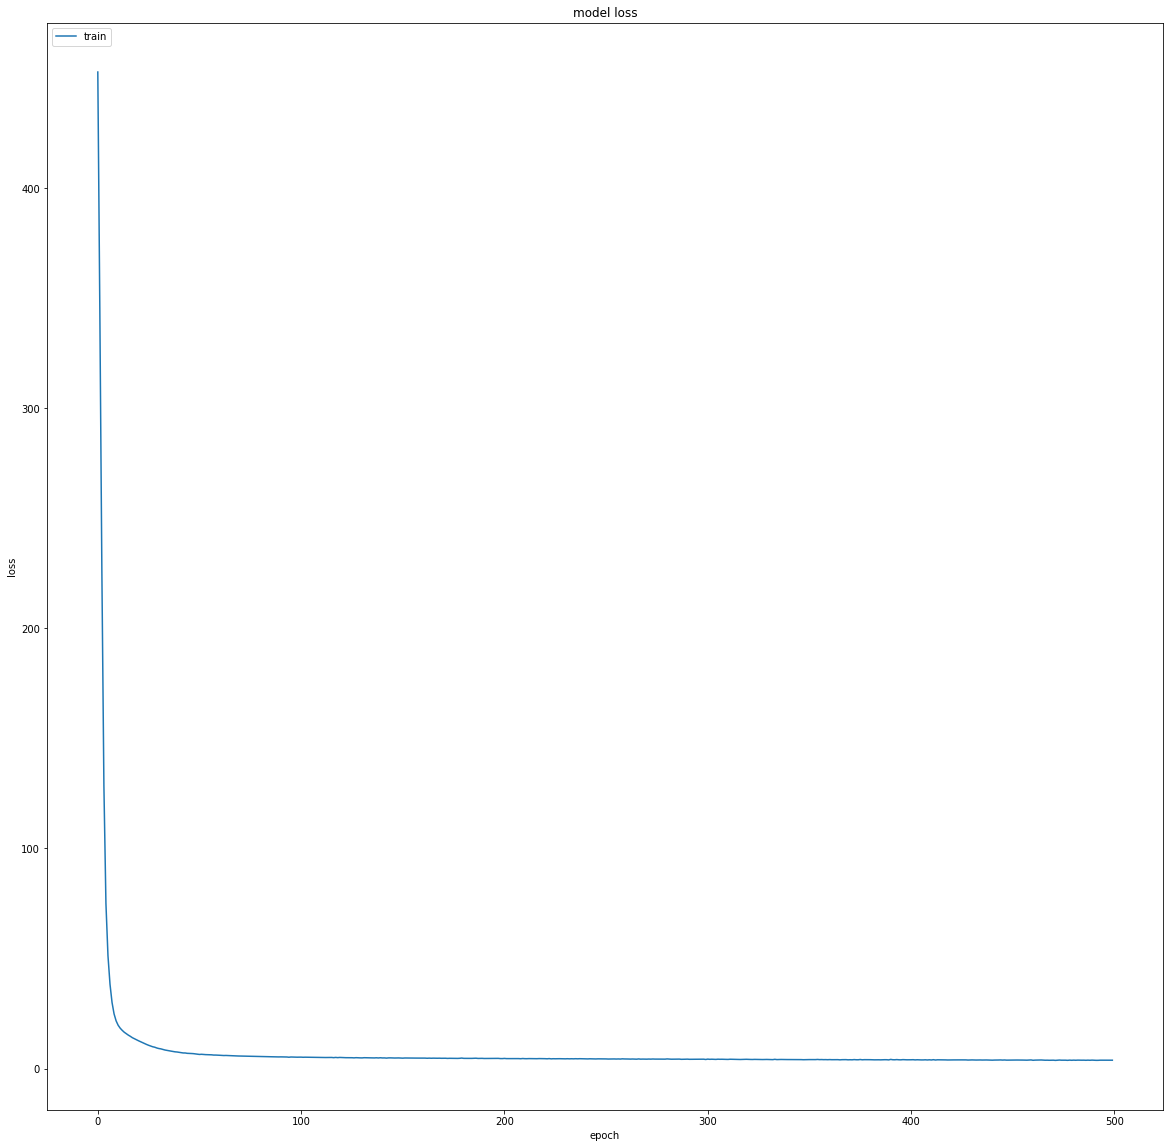

In [74]:
pyplt.plot(history.history['loss'])
pyplt.title('model loss')
pyplt.ylabel('loss')
pyplt.xlabel('epoch')
pyplt.legend(['train', 'test'], loc='upper left')
pyplt.show()

In [75]:
result_epochv1

8.384088232162151

From looking at the above results there definitely seems to deminishing returns or even signs of overfitting after the 300 epoch mark. With that it may be best to introduce early stopping once the loss metric stops reducing.  

###### Test 2 - 500 Epochs with Early Stopping

In [76]:
# Test 2
from keras.callbacks import EarlyStopping
m = ks.models.Sequential()
m.add(ks.layers.Dense(13, input_dim=13, activation="relu"))
m.add(ks.layers.Dense(1))

m.compile(loss="mean_squared_error", optimizer="adam")

#add early stopping
es = EarlyStopping(monitor='loss', patience=10, verbose=1)

history = m.fit(x_train, y_train, epochs=500, batch_size=2, callbacks=[es])

ES_prediction = m.predict(x_test).T

MedianVal_real = y_test.as_matrix().astype(np.float32)

result_ES = m.evaluate(x_test, y_test)

Epoch 1/500
372/372 [==============================] - 0s 1ms/step - loss: 416.4007
Epoch 2/500
372/372 [==============================] - 0s 601us/step - loss: 300.4273
Epoch 3/500
372/372 [==============================] - 0s 586us/step - loss: 192.6591
Epoch 4/500
372/372 [==============================] - 0s 568us/step - loss: 132.9470
Epoch 5/500
372/372 [==============================] - 0s 569us/step - loss: 101.3126
Epoch 6/500
372/372 [==============================] - 0s 588us/step - loss: 74.5618
Epoch 7/500
372/372 [==============================] - 0s 568us/step - loss: 51.8768
Epoch 8/500
372/372 [==============================] - 0s 580us/step - loss: 36.3599
Epoch 9/500
372/372 [==============================] - 0s 589us/step - loss: 28.4169
Epoch 10/500
372/372 [==============================] - 0s 604us/step - loss: 24.5548
Epoch 11/500
372/372 [==============================] - 0s 587us/step - loss: 22.3084
Epoch 12/500
372/372 [==============================] - 0s 6

372/372 [==============================] - 0s 618us/step - loss: 5.2420
Epoch 98/500
372/372 [==============================] - 0s 609us/step - loss: 5.2185
Epoch 99/500
372/372 [==============================] - 0s 594us/step - loss: 5.2820
Epoch 100/500
372/372 [==============================] - 0s 586us/step - loss: 5.2600
Epoch 101/500
372/372 [==============================] - 0s 600us/step - loss: 5.2167
Epoch 102/500
372/372 [==============================] - 0s 604us/step - loss: 5.2723
Epoch 103/500
372/372 [==============================] - 0s 588us/step - loss: 5.2365
Epoch 104/500
372/372 [==============================] - 0s 609us/step - loss: 5.2351
Epoch 105/500
372/372 [==============================] - 0s 592us/step - loss: 5.2289
Epoch 106/500
372/372 [==============================] - 0s 602us/step - loss: 5.2160
Epoch 107/500
372/372 [==============================] - 0s 578us/step - loss: 5.1750
Epoch 108/500
372/372 [==============================] - 0s 592us/step

c:\users\conor\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


In [77]:
result_ES

8.051695742505663

#### 4.4.2.1 Commentary

Early stopping kicked in at before the 230 epoch mark in most test. This is even when the test was set to only stop when the loss value had no descresed for the previous 10 epochs.

In future there is probably no benefit to be gained from going over 250 Epochs

### 4.4.3 Number of Units per Layer

###### Test 1 - (inputs + outputs) x 2/3

One heuristic is that the number of units in the  hidden layer should be calculated using the above formula. We will test this first.

In [78]:
14*(2/3)


9.333333333333332

In [79]:
# Test 1
m = ks.models.Sequential()
m.add(ks.layers.Dense(9, input_dim=13, activation="relu"))
m.add(ks.layers.Dense(1))

m.compile(loss="mean_squared_error", optimizer="adam")

#add early stopping
es = EarlyStopping(monitor='loss', patience=10, verbose=1)

history = m.fit(x_train, y_train, epochs=250, batch_size=2, callbacks=[es])

layersize9_prediction = m.predict(x_test).T

MedianVal_real = y_test.as_matrix().astype(np.float32)

result_layerN9 = m.evaluate(x_test, y_test)

Epoch 1/250
372/372 [==============================] - 1s 1ms/step - loss: 447.4083
Epoch 2/250
372/372 [==============================] - 0s 623us/step - loss: 378.2660
Epoch 3/250
372/372 [==============================] - 0s 594us/step - loss: 280.5047
Epoch 4/250
372/372 [==============================] - 0s 582us/step - loss: 178.8322
Epoch 5/250
372/372 [==============================] - 0s 613us/step - loss: 103.3704
Epoch 6/250
372/372 [==============================] - 0s 617us/step - loss: 60.7900
Epoch 7/250
372/372 [==============================] - 0s 596us/step - loss: 40.3659
Epoch 8/250
372/372 [==============================] - 0s 588us/step - loss: 30.0733
Epoch 9/250
372/372 [==============================] - 0s 590us/step - loss: 24.4410
Epoch 10/250
372/372 [==============================] - 0s 582us/step - loss: 21.2069
Epoch 11/250
372/372 [==============================] - 0s 606us/step - loss: 19.1991
Epoch 12/250
372/372 [==============================] - 0s 5

c:\users\conor\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [80]:
result_layerN9

8.323373987319622

###### Test 2 - Twice the number of Inputs

One heuristics is that the number of units in the hidden layer should not be over twice the number of inputs.

In [81]:
# Test 2
m = ks.models.Sequential()
m.add(ks.layers.Dense(26, input_dim=13, activation="relu"))
m.add(ks.layers.Dense(1))

m.compile(loss="mean_squared_error", optimizer="adam")

#add early stopping
es = EarlyStopping(monitor='loss', patience=10, verbose=1)

history = m.fit(x_train, y_train, epochs=250, batch_size=2, callbacks=[es])

layersize26_prediction = m.predict(x_test).T

MedianVal_real = y_test.as_matrix().astype(np.float32)

result_layerN26 = m.evaluate(x_test, y_test)

Epoch 1/250
372/372 [==============================] - 0s 1ms/step - loss: 439.1145
Epoch 2/250
372/372 [==============================] - 0s 613us/step - loss: 304.1868
Epoch 3/250
372/372 [==============================] - 0s 601us/step - loss: 156.9655
Epoch 4/250
372/372 [==============================] - 0s 601us/step - loss: 76.9344
Epoch 5/250
372/372 [==============================] - 0s 606us/step - loss: 44.0556
Epoch 6/250
372/372 [==============================] - 0s 600us/step - loss: 28.7420
Epoch 7/250
372/372 [==============================] - 0s 604us/step - loss: 21.0061
Epoch 8/250
372/372 [==============================] - 0s 633us/step - loss: 17.1005
Epoch 9/250
372/372 [==============================] - 0s 596us/step - loss: 15.0666
Epoch 10/250
372/372 [==============================] - 0s 590us/step - loss: 13.6486
Epoch 11/250
372/372 [==============================] - 0s 592us/step - loss: 12.6627
Epoch 12/250
372/372 [==============================] - 0s 607

c:\users\conor\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [82]:
result_layerN26

7.729459732136828

###### Test 3 - Quadrupel the Input

In [83]:
m = ks.models.Sequential()
m.add(ks.layers.Dense(52, input_dim=13, activation="relu"))
m.add(ks.layers.Dense(1))

m.compile(loss="mean_squared_error", optimizer="adam")

#add early stopping
es = EarlyStopping(monitor='loss', patience=10, verbose=1)

history = m.fit(x_train, y_train, epochs=250, batch_size=2, callbacks=[es])

layersize52_prediction = m.predict(x_test).T

MedianVal_real = y_test.as_matrix().astype(np.float32)

result_layerN52 = m.evaluate(x_test, y_test)

Epoch 1/250
372/372 [==============================] - 1s 1ms/step - loss: 379.3427
Epoch 2/250
372/372 [==============================] - 0s 631us/step - loss: 160.2390
Epoch 3/250
372/372 [==============================] - 0s 633us/step - loss: 43.4003
Epoch 4/250
372/372 [==============================] - 0s 654us/step - loss: 22.5567
Epoch 5/250
372/372 [==============================] - 0s 640us/step - loss: 17.5796
Epoch 6/250
372/372 [==============================] - 0s 633us/step - loss: 15.4868
Epoch 7/250
372/372 [==============================] - 0s 643us/step - loss: 14.0838
Epoch 8/250
372/372 [==============================] - 0s 639us/step - loss: 12.9681
Epoch 9/250
372/372 [==============================] - 0s 630us/step - loss: 11.8159
Epoch 10/250
372/372 [==============================] - 0s 609us/step - loss: 11.2863
Epoch 11/250
372/372 [==============================] - 0s 636us/step - loss: 10.5059
Epoch 12/250
372/372 [==============================] - 0s 611u

c:\users\conor\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


94/94 [==============================] - 0s 2ms/step


In [84]:
result_layerN52

5.981633308085989

Results appear inconclusive again. Need to test mutliple times and get an average.

In [85]:
def unitsize_test(tests, batchsize, unit_size):
    counter = 0
    resultslist = []
    while counter < tests:
        m = ks.models.Sequential()
        m.add(ks.layers.Dense(unit_size, input_dim=13, activation="relu"))
        m.add(ks.layers.Dense(1))

        m.compile(loss="mean_squared_error", optimizer="adam")
        
        es = EarlyStopping(monitor='loss', patience=10, verbose=1)
        
        m.fit(x_train, y_train, epochs=300, batch_size=batchsize, callbacks=[es])

        #unit_prediction = m.predict(x_test).T

        #MedianVal_real = y_test.as_matrix().astype(np.float32)

        result_units = m.evaluate(x_test, y_test)
        counter += 1
        resultslist.append(result_units)
    avg_result = sum(resultslist) / tests
    return avg_result

In [86]:
# hidden layer size = 26
# batch size = 2
# epoch = 300 - with early stopping
#print(unitsize_test(5, 2, 26))

Result was 8.461502002147919

In [87]:
# hidden layer size = 26
# batch size = 4
# epoch = 300 - with early stopping
#print(unitsize_test(5, 4, 26))

Result was 7.670181302821382

In [88]:
# hidden layer size = 52
# batch size = 2
# epoch = 300 - with early stopping
#print(unitsize_test(5, 2, 52))

Result was 8.024365358149751

In [89]:
# hidden layer size = 52
# batch size = 4
# epoch = 300 - with early stopping
#print(unitsize_test(5, 4, 52))

Result was 7.862417864292226

In [90]:
# hidden layer size = 64
# batch size = 2
# epoch = 300 - with early stopping
#print(unitsize_test(5, 2, 64))

Result was 8.067290689590129

In [91]:
# hidden layer size = 64
# batch size = 4
# epoch = 300 - with early stopping
#print(unitsize_test(5, 4, 64))

Result was 7.880062107329673

The best result seems to be a hidden layer of 26 units and a batch size of 4 per epoch. Batch sizes of 4 seem to consistently perform better.

### 4.4.4 Number of Layers

To begin with we will test adding one additional hidden layer of various sizes.

In [92]:
def layer_count_test(tests, batchsize, unit_size1, unit_size2):
    counter = 0
    resultslist = []
    while counter < tests:
        m = ks.models.Sequential()
        m.add(ks.layers.Dense(unit_size1, input_dim=13, activation="relu"))
        m.add(ks.layers.Dense(unit_size2, activation="relu"))
        m.add(ks.layers.Dense(1))

        m.compile(loss="mean_squared_error", optimizer="adam")
        
        es = EarlyStopping(monitor='loss', patience=10, verbose=1)
        
        m.fit(x_train, y_train, epochs=300, batch_size=batchsize, callbacks=[es])

        result_units = m.evaluate(x_test, y_test)
        
        counter += 1
        
        resultslist.append(result_units)
        #print("Version: " + tests, batchsize, unit_size1, unit_size2 + " iteration: " + counter)
        
    avg_result = sum(resultslist) / tests
    return avg_result

In [93]:
layers_test_results = [
    layer_count_test(5, 4, 13, 13),
    layer_count_test(5, 4, 26, 26),
    layer_count_test(5, 4, 26, 13),
    layer_count_test(5, 4, 52, 26),
    layer_count_test(5, 4, 64, 13),
]

Epoch 1/300
372/372 [==============================] - 1s 2ms/step - loss: 472.3634
Epoch 2/300
372/372 [==============================] - 0s 358us/step - loss: 389.8699
Epoch 3/300
372/372 [==============================] - 0s 344us/step - loss: 225.6423
Epoch 4/300
372/372 [==============================] - 0s 350us/step - loss: 95.5465
Epoch 5/300
372/372 [==============================] - 0s 337us/step - loss: 54.9789
Epoch 6/300
372/372 [==============================] - 0s 342us/step - loss: 38.8018
Epoch 7/300
372/372 [==============================] - 0s 378us/step - loss: 28.6995
Epoch 8/300
372/372 [==============================] - 0s 360us/step - loss: 22.7099
Epoch 9/300
372/372 [==============================] - 0s 385us/step - loss: 19.0616
Epoch 10/300
372/372 [==============================] - 0s 368us/step - loss: 16.7285
Epoch 11/300
372/372 [==============================] - 0s 353us/step - loss: 15.1742
Epoch 12/300
372/372 [==============================] - 0s 356

Epoch 42/300
372/372 [==============================] - 0s 367us/step - loss: 5.6995
Epoch 43/300
372/372 [==============================] - 0s 391us/step - loss: 5.7217
Epoch 44/300
372/372 [==============================] - 0s 361us/step - loss: 5.6284
Epoch 45/300
372/372 [==============================] - 0s 379us/step - loss: 5.6811
Epoch 46/300
372/372 [==============================] - 0s 364us/step - loss: 5.5970
Epoch 47/300
372/372 [==============================] - 0s 365us/step - loss: 5.5712
Epoch 48/300
372/372 [==============================] - 0s 357us/step - loss: 5.5675
Epoch 49/300
372/372 [==============================] - 0s 367us/step - loss: 5.5064
Epoch 50/300
372/372 [==============================] - 0s 356us/step - loss: 5.5841
Epoch 51/300
372/372 [==============================] - 0s 370us/step - loss: 5.4547
Epoch 52/300
372/372 [==============================] - 0s 362us/step - loss: 5.4743
Epoch 53/300
372/372 [==============================] - 0s 344us/

372/372 [==============================] - 0s 361us/step - loss: 3.0611
Epoch 233/300
372/372 [==============================] - 0s 353us/step - loss: 3.0173
Epoch 234/300
372/372 [==============================] - 0s 372us/step - loss: 2.9342
Epoch 235/300
372/372 [==============================] - 0s 364us/step - loss: 2.9488
Epoch 236/300
372/372 [==============================] - 0s 348us/step - loss: 2.9957
Epoch 237/300
372/372 [==============================] - 0s 339us/step - loss: 2.9874
Epoch 238/300
372/372 [==============================] - 0s 390us/step - loss: 3.0080
Epoch 239/300
372/372 [==============================] - 0s 359us/step - loss: 3.0687
Epoch 240/300
372/372 [==============================] - 0s 358us/step - loss: 2.9400
Epoch 241/300
372/372 [==============================] - 0s 355us/step - loss: 2.8939
Epoch 242/300
372/372 [==============================] - 0s 357us/step - loss: 2.9897
Epoch 243/300
372/372 [==============================] - 0s 353us/st

372/372 [==============================] - 0s 357us/step - loss: 7.3170
Epoch 28/300
372/372 [==============================] - 0s 359us/step - loss: 7.2438
Epoch 29/300
372/372 [==============================] - 0s 383us/step - loss: 7.0834
Epoch 30/300
372/372 [==============================] - 0s 361us/step - loss: 6.9786
Epoch 31/300
372/372 [==============================] - 0s 357us/step - loss: 6.8643
Epoch 32/300
372/372 [==============================] - 0s 358us/step - loss: 6.8197
Epoch 33/300
372/372 [==============================] - 0s 372us/step - loss: 6.7732
Epoch 34/300
372/372 [==============================] - 0s 368us/step - loss: 6.7239
Epoch 35/300
372/372 [==============================] - 0s 370us/step - loss: 6.6338
Epoch 36/300
372/372 [==============================] - 0s 370us/step - loss: 6.4787
Epoch 37/300
372/372 [==============================] - 0s 356us/step - loss: 6.4515
Epoch 38/300
372/372 [==============================] - 0s 370us/step - loss: 

372/372 [==============================] - 0s 357us/step - loss: 4.4895
Epoch 124/300
372/372 [==============================] - 0s 376us/step - loss: 4.3011
Epoch 125/300
372/372 [==============================] - 0s 367us/step - loss: 4.3553
Epoch 126/300
372/372 [==============================] - 0s 374us/step - loss: 4.3459
Epoch 127/300
372/372 [==============================] - 0s 374us/step - loss: 4.3598
Epoch 128/300
372/372 [==============================] - 0s 371us/step - loss: 4.3716
Epoch 129/300
372/372 [==============================] - 0s 374us/step - loss: 4.4755
Epoch 130/300
372/372 [==============================] - 0s 379us/step - loss: 4.3629
Epoch 131/300
372/372 [==============================] - 0s 365us/step - loss: 4.3288
Epoch 132/300
372/372 [==============================] - 0s 381us/step - loss: 4.3648
Epoch 133/300
372/372 [==============================] - 0s 372us/step - loss: 4.3124
Epoch 134/300
372/372 [==============================] - 0s 376us/st

372/372 [==============================] - 0s 372us/step - loss: 5.9286
Epoch 48/300
372/372 [==============================] - 0s 391us/step - loss: 5.8387
Epoch 49/300
372/372 [==============================] - 0s 388us/step - loss: 5.6803
Epoch 50/300
372/372 [==============================] - 0s 381us/step - loss: 5.7684
Epoch 51/300
372/372 [==============================] - 0s 369us/step - loss: 5.6414
Epoch 52/300
372/372 [==============================] - 0s 376us/step - loss: 5.5985
Epoch 53/300
372/372 [==============================] - 0s 395us/step - loss: 5.5945
Epoch 54/300
372/372 [==============================] - 0s 376us/step - loss: 5.6010
Epoch 55/300
372/372 [==============================] - 0s 372us/step - loss: 5.4921
Epoch 56/300
372/372 [==============================] - 0s 382us/step - loss: 5.5609
Epoch 57/300
372/372 [==============================] - 0s 385us/step - loss: 5.3543
Epoch 58/300
372/372 [==============================] - 0s 375us/step - loss: 

372/372 [==============================] - 0s 385us/step - loss: 4.4531
Epoch 124/300
372/372 [==============================] - 0s 404us/step - loss: 4.5395
Epoch 125/300
372/372 [==============================] - 0s 412us/step - loss: 4.5153
Epoch 126/300
372/372 [==============================] - 0s 377us/step - loss: 4.5066
Epoch 127/300
372/372 [==============================] - 0s 390us/step - loss: 4.4897
Epoch 128/300
372/372 [==============================] - 0s 416us/step - loss: 4.4192
Epoch 129/300
372/372 [==============================] - 0s 401us/step - loss: 4.4860
Epoch 130/300
372/372 [==============================] - 0s 386us/step - loss: 4.4308
Epoch 131/300
372/372 [==============================] - 0s 406us/step - loss: 4.5197
Epoch 132/300
372/372 [==============================] - 0s 388us/step - loss: 4.4148
Epoch 133/300
372/372 [==============================] - 0s 379us/step - loss: 4.3912
Epoch 134/300
372/372 [==============================] - 0s 385us/st

372/372 [==============================] - 0s 393us/step - loss: 3.8037
Epoch 109/300
372/372 [==============================] - 0s 425us/step - loss: 3.7980
Epoch 110/300
372/372 [==============================] - 0s 399us/step - loss: 3.7731
Epoch 111/300
372/372 [==============================] - 0s 402us/step - loss: 3.8116
Epoch 112/300
372/372 [==============================] - 0s 400us/step - loss: 3.7474
Epoch 113/300
372/372 [==============================] - 0s 407us/step - loss: 3.6947
Epoch 114/300
372/372 [==============================] - 0s 394us/step - loss: 3.6685
Epoch 115/300
372/372 [==============================] - 0s 411us/step - loss: 3.7589
Epoch 116/300
372/372 [==============================] - 0s 411us/step - loss: 3.5369
Epoch 117/300
372/372 [==============================] - 0s 387us/step - loss: 3.6083
Epoch 118/300
372/372 [==============================] - 0s 414us/step - loss: 3.6125
Epoch 119/300
372/372 [==============================] - 0s 400us/st

372/372 [==============================] - 0s 383us/step - loss: 1.8552
Epoch 299/300
372/372 [==============================] - 0s 387us/step - loss: 1.8849
Epoch 300/300
94/94 [==============================] - 0s 4ms/step
Epoch 1/300
372/372 [==============================] - 1s 2ms/step - loss: 406.7096
Epoch 2/300
372/372 [==============================] - 0s 420us/step - loss: 138.1047
Epoch 3/300
372/372 [==============================] - 0s 434us/step - loss: 25.9739
Epoch 4/300
372/372 [==============================] - 0s 429us/step - loss: 18.5963
Epoch 5/300
372/372 [==============================] - 0s 404us/step - loss: 15.9129
Epoch 6/300
372/372 [==============================] - 0s 438us/step - loss: 14.2485
Epoch 7/300
372/372 [==============================] - 0s 440us/step - loss: 12.9642
Epoch 8/300
372/372 [==============================] - 0s 412us/step - loss: 11.9149
Epoch 9/300
372/372 [==============================] - 0s 387us/step - loss: 11.0644
Epoch 10/3

372/372 [==============================] - 0s 385us/step - loss: 321.3703
Epoch 3/300
372/372 [==============================] - 0s 423us/step - loss: 92.6343
Epoch 4/300
372/372 [==============================] - 0s 378us/step - loss: 27.5526
Epoch 5/300
372/372 [==============================] - 0s 399us/step - loss: 16.8340
Epoch 6/300
372/372 [==============================] - 0s 425us/step - loss: 14.0881
Epoch 7/300
372/372 [==============================] - 0s 396us/step - loss: 12.6535
Epoch 8/300
372/372 [==============================] - 0s 435us/step - loss: 11.6473
Epoch 9/300
372/372 [==============================] - 0s 400us/step - loss: 10.9787
Epoch 10/300
372/372 [==============================] - 0s 425us/step - loss: 10.1729
Epoch 11/300
372/372 [==============================] - 0s 395us/step - loss: 9.6331
Epoch 12/300
372/372 [==============================] - 0s 395us/step - loss: 9.2008
Epoch 13/300
372/372 [==============================] - 0s 410us/step - los

372/372 [==============================] - 0s 462us/step - loss: 1.9910
Epoch 194/300
372/372 [==============================] - 0s 443us/step - loss: 1.9804
Epoch 195/300
372/372 [==============================] - 0s 455us/step - loss: 1.9206
Epoch 196/300
372/372 [==============================] - 0s 435us/step - loss: 1.9090
Epoch 197/300
372/372 [==============================] - 0s 438us/step - loss: 2.0382
Epoch 198/300
372/372 [==============================] - 0s 437us/step - loss: 1.8779
Epoch 199/300
372/372 [==============================] - 0s 437us/step - loss: 1.9340
Epoch 200/300
372/372 [==============================] - 0s 418us/step - loss: 1.9637
Epoch 201/300
372/372 [==============================] - 0s 430us/step - loss: 1.9457
Epoch 202/300
372/372 [==============================] - 0s 432us/step - loss: 1.8480
Epoch 203/300
372/372 [==============================] - 0s 421us/step - loss: 1.8677
Epoch 204/300
372/372 [==============================] - 0s 450us/st

372/372 [==============================] - 0s 545us/step - loss: 3.6203
Epoch 92/300
372/372 [==============================] - 0s 396us/step - loss: 3.5083
Epoch 93/300
372/372 [==============================] - 0s 515us/step - loss: 3.6981
Epoch 94/300
372/372 [==============================] - 0s 555us/step - loss: 3.5957
Epoch 95/300
372/372 [==============================] - 0s 560us/step - loss: 3.5873
Epoch 96/300
372/372 [==============================] - 0s 550us/step - loss: 3.5644
Epoch 97/300
372/372 [==============================] - 0s 563us/step - loss: 3.4373
Epoch 98/300
372/372 [==============================] - 0s 507us/step - loss: 3.5773
Epoch 99/300
372/372 [==============================] - 0s 497us/step - loss: 3.5082
Epoch 100/300
372/372 [==============================] - 0s 536us/step - loss: 3.4543
Epoch 101/300
372/372 [==============================] - 0s 498us/step - loss: 3.4029
Epoch 102/300
372/372 [==============================] - 0s 507us/step - los

372/372 [==============================] - 0s 408us/step - loss: 3.7883
Epoch 123/300
372/372 [==============================] - 0s 451us/step - loss: 3.9214
Epoch 124/300
372/372 [==============================] - 0s 438us/step - loss: 3.7195
Epoch 125/300
372/372 [==============================] - 0s 430us/step - loss: 3.6101
Epoch 126/300
372/372 [==============================] - 0s 456us/step - loss: 3.7712
Epoch 127/300
372/372 [==============================] - 0s 436us/step - loss: 3.6770
Epoch 128/300
372/372 [==============================] - 0s 454us/step - loss: 3.6328
Epoch 129/300
372/372 [==============================] - 0s 439us/step - loss: 3.5525
Epoch 130/300
372/372 [==============================] - 0s 412us/step - loss: 3.6392
Epoch 131/300
372/372 [==============================] - 0s 490us/step - loss: 3.6634
Epoch 132/300
372/372 [==============================] - 0s 435us/step - loss: 3.5811
Epoch 133/300
372/372 [==============================] - 0s 424us/st

Epoch 39/300
372/372 [==============================] - 0s 447us/step - loss: 5.2841
Epoch 40/300
372/372 [==============================] - 0s 501us/step - loss: 5.1389
Epoch 41/300
372/372 [==============================] - 0s 441us/step - loss: 5.0821
Epoch 42/300
372/372 [==============================] - 0s 435us/step - loss: 5.0226
Epoch 43/300
372/372 [==============================] - 0s 470us/step - loss: 4.9308
Epoch 44/300
372/372 [==============================] - 0s 453us/step - loss: 4.9198
Epoch 45/300
372/372 [==============================] - 0s 470us/step - loss: 4.9192
Epoch 46/300
372/372 [==============================] - 0s 455us/step - loss: 4.9063
Epoch 47/300
372/372 [==============================] - 0s 462us/step - loss: 4.9548
Epoch 48/300
372/372 [==============================] - 0s 472us/step - loss: 4.8360
Epoch 49/300
372/372 [==============================] - 0s 468us/step - loss: 4.7332
Epoch 50/300
372/372 [==============================] - 0s 474us/

Epoch 135/300
372/372 [==============================] - 0s 507us/step - loss: 3.6445
Epoch 136/300
372/372 [==============================] - 0s 497us/step - loss: 3.5982
Epoch 137/300
372/372 [==============================] - 0s 486us/step - loss: 3.4245
Epoch 138/300
372/372 [==============================] - 0s 498us/step - loss: 3.4593
Epoch 139/300
372/372 [==============================] - 0s 490us/step - loss: 3.4782
Epoch 140/300
372/372 [==============================] - 0s 507us/step - loss: 3.4574
Epoch 141/300
372/372 [==============================] - 0s 487us/step - loss: 3.4396
Epoch 142/300
372/372 [==============================] - 0s 502us/step - loss: 3.5858
Epoch 143/300
372/372 [==============================] - 0s 500us/step - loss: 3.4264
Epoch 144/300
372/372 [==============================] - 0s 504us/step - loss: 3.5336
Epoch 145/300
372/372 [==============================] - 0s 511us/step - loss: 3.3491
Epoch 146/300
372/372 [==============================]

372/372 [==============================] - 0s 442us/step - loss: 16.0981
Epoch 8/300
372/372 [==============================] - 0s 448us/step - loss: 14.3321
Epoch 9/300
372/372 [==============================] - 0s 458us/step - loss: 13.0031
Epoch 10/300
372/372 [==============================] - 0s 451us/step - loss: 11.8322
Epoch 11/300
372/372 [==============================] - 0s 432us/step - loss: 11.0561
Epoch 12/300
372/372 [==============================] - 0s 433us/step - loss: 10.3268
Epoch 13/300
372/372 [==============================] - 0s 441us/step - loss: 9.7116
Epoch 14/300
372/372 [==============================] - 0s 440us/step - loss: 9.2309
Epoch 15/300
372/372 [==============================] - 0s 436us/step - loss: 8.7851
Epoch 16/300
372/372 [==============================] - 0s 464us/step - loss: 8.3408
Epoch 17/300
372/372 [==============================] - 0s 438us/step - loss: 8.0140
Epoch 18/300
372/372 [==============================] - 0s 447us/step - lo

372/372 [==============================] - 0s 434us/step - loss: 2.7899
Epoch 199/300
372/372 [==============================] - 0s 454us/step - loss: 2.6839
Epoch 200/300
372/372 [==============================] - 0s 464us/step - loss: 2.7451
Epoch 201/300
372/372 [==============================] - 0s 450us/step - loss: 2.8005
Epoch 202/300
372/372 [==============================] - 0s 459us/step - loss: 2.7578
Epoch 203/300
372/372 [==============================] - 0s 454us/step - loss: 2.8552
Epoch 204/300
372/372 [==============================] - 0s 458us/step - loss: 2.7347
Epoch 205/300
372/372 [==============================] - 0s 457us/step - loss: 2.6931
Epoch 206/300
372/372 [==============================] - 0s 452us/step - loss: 2.7955
Epoch 207/300
372/372 [==============================] - 0s 468us/step - loss: 2.7106
Epoch 208/300
372/372 [==============================] - 0s 435us/step - loss: 2.8031
Epoch 209/300
372/372 [==============================] - 0s 449us/st

372/372 [==============================] - 0s 419us/step - loss: 4.2020
Epoch 100/300
372/372 [==============================] - 0s 442us/step - loss: 4.1241
Epoch 101/300
372/372 [==============================] - 0s 456us/step - loss: 4.1290
Epoch 102/300
372/372 [==============================] - 0s 448us/step - loss: 4.0892
Epoch 103/300
372/372 [==============================] - 0s 448us/step - loss: 4.0377
Epoch 104/300
372/372 [==============================] - 0s 442us/step - loss: 4.1169
Epoch 105/300
372/372 [==============================] - 0s 447us/step - loss: 4.0488
Epoch 106/300
372/372 [==============================] - 0s 469us/step - loss: 3.9598
Epoch 107/300
372/372 [==============================] - 0s 444us/step - loss: 3.9922
Epoch 108/300
372/372 [==============================] - 0s 440us/step - loss: 4.0356
Epoch 109/300
372/372 [==============================] - 0s 435us/step - loss: 3.9126
Epoch 110/300
372/372 [==============================] - 0s 433us/st

Epoch 147/300
372/372 [==============================] - 0s 456us/step - loss: 3.0883
Epoch 148/300
372/372 [==============================] - 0s 465us/step - loss: 2.9317
Epoch 149/300
372/372 [==============================] - 0s 457us/step - loss: 3.0186
Epoch 150/300
372/372 [==============================] - 0s 468us/step - loss: 3.0459
Epoch 151/300
372/372 [==============================] - 0s 458us/step - loss: 2.9537
Epoch 152/300
372/372 [==============================] - 0s 460us/step - loss: 2.9224
Epoch 153/300
372/372 [==============================] - 0s 475us/step - loss: 2.9297
Epoch 154/300
372/372 [==============================] - 0s 465us/step - loss: 2.8391
Epoch 155/300
372/372 [==============================] - 0s 455us/step - loss: 2.9488
Epoch 156/300
372/372 [==============================] - 0s 434us/step - loss: 2.9046
Epoch 157/300
372/372 [==============================] - 0s 469us/step - loss: 2.8656
Epoch 158/300
372/372 [==============================]

372/372 [==============================] - 0s 517us/step - loss: 4.1034
Epoch 54/300
372/372 [==============================] - 0s 533us/step - loss: 4.1367
Epoch 55/300
372/372 [==============================] - 0s 485us/step - loss: 4.0800
Epoch 56/300
372/372 [==============================] - 0s 492us/step - loss: 3.9282
Epoch 57/300
372/372 [==============================] - 0s 533us/step - loss: 4.0433
Epoch 58/300
372/372 [==============================] - 0s 507us/step - loss: 3.8353
Epoch 59/300
372/372 [==============================] - 0s 469us/step - loss: 3.9319
Epoch 60/300
372/372 [==============================] - 0s 472us/step - loss: 3.9224
Epoch 61/300
372/372 [==============================] - 0s 505us/step - loss: 3.8211
Epoch 62/300
372/372 [==============================] - 0s 495us/step - loss: 3.7757
Epoch 63/300
372/372 [==============================] - 0s 503us/step - loss: 3.8539
Epoch 64/300
372/372 [==============================] - 0s 519us/step - loss: 

Epoch 149/300
372/372 [==============================] - 0s 496us/step - loss: 2.0974
Epoch 150/300
372/372 [==============================] - 0s 512us/step - loss: 2.1893
Epoch 151/300
372/372 [==============================] - 0s 494us/step - loss: 2.3761
Epoch 152/300
372/372 [==============================] - 0s 504us/step - loss: 2.1094
Epoch 153/300
372/372 [==============================] - 0s 481us/step - loss: 2.2190
Epoch 154/300
372/372 [==============================] - 0s 490us/step - loss: 2.0556
Epoch 155/300
372/372 [==============================] - 0s 503us/step - loss: 2.0409
Epoch 156/300
372/372 [==============================] - 0s 538us/step - loss: 2.0790
Epoch 157/300
372/372 [==============================] - 0s 472us/step - loss: 2.0513
Epoch 158/300
372/372 [==============================] - 0s 496us/step - loss: 2.0985
Epoch 159/300
372/372 [==============================] - 0s 486us/step - loss: 2.1464
Epoch 160/300
372/372 [==============================]

372/372 [==============================] - 0s 516us/step - loss: 4.0487
Epoch 48/300
372/372 [==============================] - 0s 477us/step - loss: 4.0224
Epoch 49/300
372/372 [==============================] - 0s 490us/step - loss: 3.9902
Epoch 50/300
372/372 [==============================] - 0s 547us/step - loss: 3.9185
Epoch 51/300
372/372 [==============================] - 0s 567us/step - loss: 3.8514
Epoch 52/300
372/372 [==============================] - 0s 536us/step - loss: 3.8937
Epoch 53/300
372/372 [==============================] - 0s 515us/step - loss: 4.1398
Epoch 54/300
372/372 [==============================] - 0s 520us/step - loss: 3.8605
Epoch 55/300
372/372 [==============================] - 0s 549us/step - loss: 3.6792
Epoch 56/300
372/372 [==============================] - 0s 528us/step - loss: 3.7494
Epoch 57/300
372/372 [==============================] - 0s 503us/step - loss: 3.7684
Epoch 58/300
372/372 [==============================] - 0s 500us/step - loss: 

94/94 [==============================] - 1s 6ms/step
Epoch 1/300
372/372 [==============================] - 1s 3ms/step - loss: 361.2552
Epoch 2/300
372/372 [==============================] - 0s 539us/step - loss: 88.3203
Epoch 3/300
372/372 [==============================] - 0s 530us/step - loss: 19.8510
Epoch 4/300
372/372 [==============================] - 0s 570us/step - loss: 14.2829
Epoch 5/300
372/372 [==============================] - 0s 527us/step - loss: 12.2367
Epoch 6/300
372/372 [==============================] - 0s 509us/step - loss: 10.6559
Epoch 7/300
372/372 [==============================] - 0s 578us/step - loss: 9.7059
Epoch 8/300
372/372 [==============================] - 0s 580us/step - loss: 8.8965
Epoch 9/300
372/372 [==============================] - 0s 574us/step - loss: 8.5895
Epoch 10/300
372/372 [==============================] - 0s 515us/step - loss: 7.7813
Epoch 11/300
372/372 [==============================] - 0s 522us/step - loss: 7.4857
Epoch 12/300
372

372/372 [==============================] - 0s 441us/step - loss: 1.5569
Epoch 192/300
372/372 [==============================] - 0s 439us/step - loss: 1.4966
Epoch 193/300
372/372 [==============================] - 0s 447us/step - loss: 1.4547
Epoch 194/300
372/372 [==============================] - 0s 430us/step - loss: 1.5130
Epoch 195/300
372/372 [==============================] - 0s 441us/step - loss: 1.5898
Epoch 196/300
372/372 [==============================] - 0s 451us/step - loss: 1.6149
Epoch 197/300
372/372 [==============================] - 0s 446us/step - loss: 1.5325
Epoch 198/300
372/372 [==============================] - 0s 442us/step - loss: 1.5377
Epoch 199/300
372/372 [==============================] - 0s 452us/step - loss: 1.5475
Epoch 200/300
372/372 [==============================] - 0s 456us/step - loss: 1.5409
Epoch 201/300
372/372 [==============================] - 0s 467us/step - loss: 1.4665
Epoch 202/300
372/372 [==============================] - 0s 461us/st

372/372 [==============================] - 0s 555us/step - loss: 1.8507
Epoch 179/300
372/372 [==============================] - 0s 581us/step - loss: 2.0796
Epoch 180/300
372/372 [==============================] - 0s 565us/step - loss: 1.9203
Epoch 181/300
372/372 [==============================] - 0s 576us/step - loss: 2.0283
Epoch 182/300
372/372 [==============================] - 0s 568us/step - loss: 1.9070
Epoch 183/300
372/372 [==============================] - 0s 568us/step - loss: 1.8234
Epoch 184/300
372/372 [==============================] - 0s 573us/step - loss: 2.1520
Epoch 185/300
372/372 [==============================] - 0s 556us/step - loss: 1.8775
Epoch 186/300
372/372 [==============================] - 0s 564us/step - loss: 1.8848
Epoch 187/300
372/372 [==============================] - 0s 584us/step - loss: 1.7596
Epoch 188/300
372/372 [==============================] - 0s 561us/step - loss: 1.8911
Epoch 189/300
372/372 [==============================] - 0s 573us/st

372/372 [==============================] - 0s 498us/step - loss: 2.5894
Epoch 128/300
372/372 [==============================] - 0s 492us/step - loss: 2.5321
Epoch 129/300
372/372 [==============================] - 0s 507us/step - loss: 2.5751
Epoch 130/300
372/372 [==============================] - 0s 496us/step - loss: 2.5155
Epoch 131/300
372/372 [==============================] - 0s 481us/step - loss: 2.4727
Epoch 132/300
372/372 [==============================] - 0s 485us/step - loss: 2.3635
Epoch 133/300
372/372 [==============================] - 0s 512us/step - loss: 2.4793
Epoch 134/300
372/372 [==============================] - 0s 514us/step - loss: 2.4213
Epoch 135/300
372/372 [==============================] - 0s 512us/step - loss: 2.3871
Epoch 136/300
372/372 [==============================] - 0s 507us/step - loss: 2.5062
Epoch 137/300
372/372 [==============================] - 0s 493us/step - loss: 2.4460
Epoch 138/300
372/372 [==============================] - 0s 492us/st

372/372 [==============================] - 0s 479us/step - loss: 2.6319
Epoch 117/300
372/372 [==============================] - 0s 563us/step - loss: 2.6982
Epoch 118/300
372/372 [==============================] - 0s 578us/step - loss: 2.6886
Epoch 119/300
372/372 [==============================] - 0s 516us/step - loss: 2.5160
Epoch 120/300
372/372 [==============================] - 0s 556us/step - loss: 2.6159
Epoch 121/300
372/372 [==============================] - 0s 528us/step - loss: 2.5032
Epoch 122/300
372/372 [==============================] - 0s 524us/step - loss: 2.6330
Epoch 123/300
372/372 [==============================] - 0s 530us/step - loss: 2.4257
Epoch 124/300
372/372 [==============================] - 0s 520us/step - loss: 2.3585
Epoch 125/300
372/372 [==============================] - 0s 533us/step - loss: 2.5567
Epoch 126/300
372/372 [==============================] - 0s 537us/step - loss: 2.4076
Epoch 127/300
372/372 [==============================] - 0s 520us/st

372/372 [==============================] - 0s 578us/step - loss: 3.5999
Epoch 97/300
372/372 [==============================] - 0s 538us/step - loss: 3.5794
Epoch 98/300
372/372 [==============================] - 0s 575us/step - loss: 3.5747
Epoch 99/300
372/372 [==============================] - 0s 583us/step - loss: 3.5654
Epoch 100/300
372/372 [==============================] - 0s 687us/step - loss: 3.7515
Epoch 101/300
372/372 [==============================] - 0s 705us/step - loss: 3.6186
Epoch 102/300
372/372 [==============================] - 0s 590us/step - loss: 3.4607
Epoch 103/300
372/372 [==============================] - 0s 534us/step - loss: 3.4701
Epoch 104/300
372/372 [==============================] - 0s 687us/step - loss: 3.5625
Epoch 105/300
372/372 [==============================] - 0s 740us/step - loss: 3.5653
Epoch 106/300
372/372 [==============================] - 0s 716us/step - loss: 3.4815
Epoch 107/300
372/372 [==============================] - 0s 705us/step 

372/372 [==============================] - 0s 633us/step - loss: 2.0935
Epoch 287/300
372/372 [==============================] - 0s 522us/step - loss: 2.0278
Epoch 288/300
372/372 [==============================] - 0s 517us/step - loss: 2.1049
Epoch 289/300
372/372 [==============================] - 0s 625us/step - loss: 2.0170
Epoch 290/300
372/372 [==============================] - 0s 583us/step - loss: 1.9638
Epoch 291/300
372/372 [==============================] - 0s 544us/step - loss: 2.0294
Epoch 292/300
372/372 [==============================] - 0s 602us/step - loss: 2.1008
Epoch 293/300
372/372 [==============================] - 0s 590us/step - loss: 1.9453
Epoch 294/300
372/372 [==============================] - 0s 508us/step - loss: 2.0315
Epoch 295/300
372/372 [==============================] - 0s 523us/step - loss: 1.9652
Epoch 296/300
372/372 [==============================] - 0s 529us/step - loss: 1.9709
Epoch 297/300
372/372 [==============================] - 0s 515us/st

372/372 [==============================] - 0s 520us/step - loss: 1.9026
Epoch 177/300
372/372 [==============================] - 0s 565us/step - loss: 1.9846
Epoch 178/300
372/372 [==============================] - 0s 524us/step - loss: 1.8087
Epoch 179/300
372/372 [==============================] - 0s 489us/step - loss: 1.8523
Epoch 180/300
372/372 [==============================] - 0s 592us/step - loss: 1.9192
Epoch 181/300
372/372 [==============================] - 0s 553us/step - loss: 1.7872
Epoch 182/300
372/372 [==============================] - 0s 522us/step - loss: 1.8299
Epoch 183/300
372/372 [==============================] - 0s 517us/step - loss: 1.8354
Epoch 184/300
372/372 [==============================] - 0s 511us/step - loss: 1.8736
Epoch 185/300
372/372 [==============================] - 0s 523us/step - loss: 2.0209
Epoch 186/300
372/372 [==============================] - 0s 510us/step - loss: 1.9422
Epoch 187/300
372/372 [==============================] - 0s 569us/st

372/372 [==============================] - 0s 584us/step - loss: 2.2414
Epoch 176/300
372/372 [==============================] - 0s 600us/step - loss: 2.3045
Epoch 177/300
372/372 [==============================] - 0s 552us/step - loss: 2.2278
Epoch 178/300
372/372 [==============================] - 0s 526us/step - loss: 2.1779
Epoch 179/300
372/372 [==============================] - 0s 520us/step - loss: 2.2819
Epoch 180/300
372/372 [==============================] - 0s 516us/step - loss: 2.2283
Epoch 181/300
372/372 [==============================] - 0s 565us/step - loss: 2.2018
Epoch 182/300
372/372 [==============================] - 0s 499us/step - loss: 2.1784
Epoch 183/300
372/372 [==============================] - 0s 522us/step - loss: 2.3658
Epoch 184/300
372/372 [==============================] - 0s 530us/step - loss: 2.1431
Epoch 185/300
372/372 [==============================] - 0s 568us/step - loss: 2.1268
Epoch 186/300
372/372 [==============================] - 0s 514us/st

372/372 [==============================] - 0s 571us/step - loss: 3.9978
Epoch 51/300
372/372 [==============================] - 0s 532us/step - loss: 4.0921
Epoch 52/300
372/372 [==============================] - 0s 526us/step - loss: 3.9467
Epoch 53/300
372/372 [==============================] - 0s 531us/step - loss: 3.9866
Epoch 54/300
372/372 [==============================] - 0s 608us/step - loss: 3.8874
Epoch 55/300
372/372 [==============================] - 0s 647us/step - loss: 3.9838
Epoch 56/300
372/372 [==============================] - 0s 593us/step - loss: 3.7969
Epoch 57/300
372/372 [==============================] - 0s 631us/step - loss: 3.8072
Epoch 58/300
372/372 [==============================] - 0s 594us/step - loss: 3.8173
Epoch 59/300
372/372 [==============================] - 0s 577us/step - loss: 3.9386
Epoch 60/300
372/372 [==============================] - 0s 587us/step - loss: 3.7454
Epoch 61/300
372/372 [==============================] - 0s 603us/step - loss: 

372/372 [==============================] - 0s 518us/step - loss: 1.8287
Epoch 241/300
372/372 [==============================] - 0s 538us/step - loss: 1.8378
Epoch 242/300
372/372 [==============================] - 0s 561us/step - loss: 1.8443
Epoch 243/300
372/372 [==============================] - 0s 537us/step - loss: 1.9333
Epoch 244/300
372/372 [==============================] - 0s 588us/step - loss: 1.7551
Epoch 245/300
372/372 [==============================] - 0s 545us/step - loss: 1.7792
Epoch 246/300
372/372 [==============================] - 0s 595us/step - loss: 1.7611
Epoch 247/300
372/372 [==============================] - 0s 539us/step - loss: 1.7369
Epoch 248/300
372/372 [==============================] - 0s 551us/step - loss: 1.7297
Epoch 249/300
372/372 [==============================] - 0s 537us/step - loss: 1.6753
Epoch 250/300
372/372 [==============================] - 0s 527us/step - loss: 1.8448
Epoch 251/300
372/372 [==============================] - 0s 524us/st

In [94]:
labels = ["13 -> 13", "26 -> 26", "26 -> 13", "52 -> 26", "64 -> 13"]

In [95]:
layerresults_df = pd.DataFrame({'Tests': labels, 'Results': layers_test_results})

In [96]:
layerresults_df

,Tests,Results
0,13 -> 13,7.245921
1,26 -> 26,6.697935
2,26 -> 13,6.957775
3,52 -> 26,6.000329
4,64 -> 13,5.911342


##### Test with 3 Layers 

In [97]:
def three_layer_count_test(tests, batchsize, unit_size1, unit_size2, unit_size3):
    counter = 0
    resultslist = []
    while counter < tests:
        m = ks.models.Sequential()
        m.add(ks.layers.Dense(unit_size1, input_dim=13, activation="relu"))
        m.add(ks.layers.Dense(unit_size2, activation="relu"))
        m.add(ks.layers.Dense(unit_size3, activation="relu"))
        m.add(ks.layers.Dense(1))

        m.compile(loss="mean_squared_error", optimizer="adam")
        
        es = EarlyStopping(monitor='loss', patience=10, verbose=1)
        
        m.fit(x_train, y_train, epochs=300, batch_size=batchsize, callbacks=[es])

        result_units = m.evaluate(x_test, y_test)
        
        counter += 1
        
        resultslist.append(result_units)
   
        
    avg_result = sum(resultslist) / tests
    return avg_result

In [98]:
# three_layers_test_results = [
#     three_layer_count_test(5, 4, 13, 13, 13),
#     three_layer_count_test(5, 4, 26, 13, 13),
#     three_layer_count_test(5, 4, 26, 13, 9),
#     three_layer_count_test(5, 4, 52, 26, 13),
#     three_layer_count_test(5, 4, 64, 26, 13)
# ]

In [99]:
#labels = ["13 -> 13 -> 13", "26 -> 13 - > 13", "26 -> 13 -> 9", "52 -> 26 -> 13", "64 -> 26 -> 13"]

In [100]:
#three_layerresults_df = pd.DataFrame({'Tests': labels, 'Results': three_layers_test_results})
#three_layerresults_df

Two layers good, three layers bad....

## 4.5 Further Tuning

In an attempt to further tune the model an achieve better results I will add two further tuning stages:

1. Whitening 
2. Feature Selection


### 4.5.1 Whitening

PCA attempts to summarise datasets and remove dedundancy by "merging" corrolated features or variables. If two features are telling us the same thing or not really adding to the ability of a model to predict a value [13].

Before applying PCA it is necessary to normalise / standardise the data [14].

In [120]:
w_inputs = no_outliers.iloc[:, 0:13]
w_inputs.head()

,Crime_Rate,%_Large_Plots,%_Indus,By_River,NOX,Rooms,%_Pre_1940,Dist_to_Jobs,Highway_Access,Tax,PTRatio,Blks_per_1000,%_Lower_Status
83,0.03551,25.0,4.86,0.0,0.4260,6.167,46.7,5.4007,4.0,281.0,19.0,390.64,7.51
130,0.34006,0.0,21.89,0.0,0.6240,6.458,98.9,2.1185,4.0,437.0,21.2,395.04,12.60
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
90,0.04684,0.0,3.41,0.0,0.4890,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81
438,13.67810,0.0,18.10,0.0,0.7400,5.935,87.9,1.8206,24.0,666.0,20.2,68.95,34.02


In [121]:
w_outputs = no_outliers[['Median_Val']]
w_outputs.head()

,Median_Val
83,22.9
130,19.2
332,19.4
90,22.6
438,8.4


In [122]:
wx_train, wx_test, wy_train, wy_test = mod.train_test_split(w_inputs, w_outputs, test_size=0.2)

In [123]:
# Normalise the training data first before PCA
w_scaler = pre.StandardScaler()
wx_train_scaled = pd.DataFrame(w_scaler.fit_transform(wx_train), columns=w_inputs.columns)
wx_test_scaled = pd.DataFrame(w_scaler.transform(wx_test), columns=w_inputs.columns)

In [124]:
wx_train_scaled.head()

,Crime_Rate,%_Large_Plots,%_Indus,By_River,NOX,Rooms,%_Pre_1940,Dist_to_Jobs,Highway_Access,Tax,PTRatio,Blks_per_1000,%_Lower_Status
0,1.719890,-0.493641,0.979303,-0.250713,1.582847,-0.435845,0.706070,-0.960216,1.673207,1.535357,0.766089,-3.460958,3.038241
1,1.668046,-0.493641,0.979303,-0.250713,1.181135,-0.516843,0.949189,-0.978624,1.673207,1.535357,0.766089,0.428095,0.481297
2,-0.385758,-0.493641,-0.477923,-0.250713,-0.143662,-0.454407,0.927738,0.272849,-0.634665,-0.611924,1.149520,0.397618,0.474062
3,-0.505743,2.874565,-1.083638,-0.250713,-1.237688,-0.515156,-0.734768,1.669001,-0.750058,0.357044,1.197449,0.428095,0.257004
4,-0.487470,1.527283,-1.165570,-0.250713,-1.006917,0.612067,-1.396196,0.352743,-0.519271,-0.067627,-1.630355,0.261362,-1.224779


In [125]:
wx_test_scaled.head()

,Crime_Rate,%_Large_Plots,%_Indus,By_River,NOX,Rooms,%_Pre_1940,Dist_to_Jobs,Highway_Access,Tax,PTRatio,Blks_per_1000,%_Lower_Status
0,-0.498529,0.067726,-0.780780,-0.250713,-1.246235,-0.532030,-1.671492,1.276131,-0.634665,-0.384635,0.143014,0.419913,-0.712522
1,0.252487,-0.493641,0.979303,-0.250713,1.352076,-0.366659,0.706070,-0.596847,1.673207,1.535357,0.766089,-4.154335,0.866213
2,-0.480660,-0.493641,-0.589117,-0.250713,-0.528281,0.392697,-0.566730,0.340168,-0.519271,-0.731550,0.478516,0.428095,-0.842757
3,-0.304070,-0.493641,-0.477923,-0.250713,-0.143662,-1.051768,1.070749,-0.014834,-0.634665,-0.611924,1.149520,0.187008,1.157071
4,2.230297,-0.493641,0.979303,-0.250713,1.240964,-1.546193,1.070749,-1.148834,1.673207,1.535357,0.766089,0.428095,2.573737


In [126]:
# perform PCA on Normalised training set
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(wx_train_scaled)
w_train_whitened = pd.DataFrame(pca.transform(wx_train_scaled), columns=wx_train_scaled.columns)
w_test_whitened = pd.DataFrame(pca.transform(wx_test_scaled), columns=wx_test_scaled.columns)

In [130]:
w_train_whitened.corr().round().head()

,Crime_Rate,%_Large_Plots,%_Indus,By_River,NOX,Rooms,%_Pre_1940,Dist_to_Jobs,Highway_Access,Tax,PTRatio,Blks_per_1000,%_Lower_Status
Crime_Rate,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
%_Large_Plots,0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
%_Indus,-0.0,-0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
By_River,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
NOX,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0


In [131]:
w_test_whitened.corr().round().head()

,Crime_Rate,%_Large_Plots,%_Indus,By_River,NOX,Rooms,%_Pre_1940,Dist_to_Jobs,Highway_Access,Tax,PTRatio,Blks_per_1000,%_Lower_Status
Crime_Rate,1.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
%_Large_Plots,-0.0,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-1.0,-0.0
%_Indus,0.0,-0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
By_River,-0.0,0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
NOX,-0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0


In [135]:
# test with scaled and whitened data
def whitened_tester(unit1, unit2):
    counter = 0
    results = []
    while counter < 5:
        m = ks.models.Sequential()
        m.add(ks.layers.Dense(unit1, input_dim=13, activation="relu"))
        m.add(ks.layers.Dense(unit2, activation="relu"))
        m.add(ks.layers.Dense(1))

        m.compile(loss="mean_squared_error", optimizer="adam")

        es = EarlyStopping(monitor='loss', patience=10, verbose=1)

        m.fit(w_train_whitened, wy_train, epochs=300, batch_size=4, callbacks=[es])

        result_units = m.evaluate(w_test_whitened, wy_test)

        counter += 1

        results.append(result_units)
   
        
    avg_result = sum(results) / tests
    return avg_result

Epoch 1/300
372/372 [==============================] - 1s 4ms/step - loss: 456.3761
Epoch 2/300
372/372 [==============================] - 0s 709us/step - loss: 404.2117
Epoch 3/300
372/372 [==============================] - 0s 590us/step - loss: 346.2228
Epoch 4/300
372/372 [==============================] - 0s 600us/step - loss: 281.0930
Epoch 5/300
372/372 [==============================] - 0s 829us/step - loss: 212.9549
Epoch 6/300
372/372 [==============================] - 0s 1ms/step - loss: 149.1491
Epoch 7/300
372/372 [==============================] - 0s 1ms/step - loss: 96.1687
Epoch 8/300
372/372 [==============================] - 0s 1ms/step - loss: 57.6028
Epoch 9/300
372/372 [==============================] - 0s 1ms/step - loss: 33.2842
Epoch 10/300
372/372 [==============================] - 0s 929us/step - loss: 20.1005
Epoch 11/300
372/372 [==============================] - 0s 1ms/step - loss: 13.9261
Epoch 12/300
372/372 [==============================] - 0s 878us/step

372/372 [==============================] - 0s 581us/step - loss: 2.9562
Epoch 194/300
372/372 [==============================] - 0s 889us/step - loss: 2.9723
Epoch 195/300
372/372 [==============================] - 0s 1ms/step - loss: 2.9471
Epoch 196/300
372/372 [==============================] - 0s 1ms/step - loss: 2.9417
Epoch 197/300
372/372 [==============================] - 1s 1ms/step - loss: 2.9284
Epoch 198/300
372/372 [==============================] - 0s 774us/step - loss: 2.9561
Epoch 199/300
372/372 [==============================] - 0s 873us/step - loss: 2.9086
Epoch 200/300
372/372 [==============================] - 0s 782us/step - loss: 2.9123
Epoch 201/300
372/372 [==============================] - 0s 820us/step - loss: 2.8907
Epoch 202/300
372/372 [==============================] - 0s 764us/step - loss: 2.9100
Epoch 203/300
372/372 [==============================] - 0s 764us/step - loss: 2.9103
Epoch 204/300
372/372 [==============================] - 0s 773us/step - l

In [136]:
whitened_tests = [
    whitened_tester()
    
]

14.60130849797675


### 4.5.2 Feature / Variable Selection

Before creating the model it is first necessary to choose which "features" or "variables" we will use in our model.

Generally speaking, the more features used in the model, the better the prediction will be. However this a trade off outlined in the table below:


|LESS FEATURES|MORE FEATURES|
|:------------------------|:---------|
|Easier to iterpret|Harder to interpret|
|Less likely to over fit|More likely to overfit|
|Lower predictiton accuracy|Higher predicition accuracy|

### 4.1.1 Calculate the predictive power of each feature

#### Corrolation
One method of doing this is corrolation of each variable with the target variable. There should also be low corrolation between predictors.

#### Wrapper Method

Predictive power of jointly evaluated variables

#### Embedded Method

This just allows the algorith to do it for you. Bad predictors are given a low weight. Also know as the Shrinkage Method.

In [103]:
df.head()

,Crime_Rate,%_Large_Plots,%_Indus,By_River,NOX,Rooms,%_Pre_1940,Dist_to_Jobs,Highway_Access,Tax,PTRatio,Blks_per_1000,%_Lower_Status,Median_Val
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 5. References

1. Why Multicollinearity is bad https://en.wikipedia.org/wiki/Multicollinearity (why we exclude Tax, Highway_access, Dis_to_jobs, and %Pre_1940)
2. Good example of the project with other features removed https://olegleyz.github.io/boston_housing.html
3. Another good project http://www.neural.cz/dataset-exploration-boston-house-pricing.html


[1] Brownlee, J. (2019). How to Configure the Number of Layers and Nodes in a Neural Network. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/ [Accessed 27 Nov. 2019].

[2] Faqs.org. (2019). comp.ai.neural-nets FAQ, Part 3 of 7: GeneralizationSection - How many hidden layers should I use?. [online] Available at: http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-9.html [Accessed 27 Nov. 2019].

[3] Faqs.org. (2019). comp.ai.neural-nets FAQ, Part 3 of 7: GeneralizationSection - How many hidden units should I use?. [online] Available at: http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-10.html [Accessed 27 Nov. 2019].

[4] Learning, D. and Them?, F. (2019). Fundamentals of Deep Learning - Activation Functions and their use. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2017/10/fundamentals-deep-learning-activation-functions-when-to-use-them/ [Accessed 27 Nov. 2019].

[5] Medium. (2019). Activation functions and it’s types-Which is better?. [online] Available at: https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f [Accessed 27 Nov. 2019].

[6] Gupta, V. (2019). Deep learning using Keras - The Basics | Learn OpenCV. [online] Learnopencv.com. Available at: https://www.learnopencv.com/deep-learning-using-keras-the-basics/ [Accessed 27 Nov. 2019].

[7] Brownlee, J. (2019). A Gentle Introduction to the Rectified Linear Unit (ReLU). [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/ [Accessed 27 Nov. 2019].

[8] Sebastian Ruder. (2019). An overview of gradient descent optimization algorithms. [online] Available at: https://ruder.io/optimizing-gradient-descent/index.html#conclusion [Accessed 27 Nov. 2019].

[9] Brownlee, J. (2019). Gentle Introduction to the Adam Optimization Algorithm for Deep Learning. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/ [Accessed 27 Nov. 2019].

[10] Algorithmia Blog. (2019). Introduction to Optimizers | Algorithmia Blog. [online] Available at: https://algorithmia.com/blog/introduction-to-optimizers [Accessed 27 Nov. 2019].

[11] Medium. (2019). Epoch vs Batch Size vs Iterations. [online] Available at: https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9 [Accessed 27 Nov. 2019].

[12] Brownlee, J. (2019). A Gentle Introduction to Mini-Batch Gradient Descent and How to Configure Batch Size. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/ [Accessed 27 Nov. 2019].